# Module 4 Project

# Jaklyn Soler

# Objective

Provided with median sale values of single family homes from Zillow, you will be responsible for recommending 5 top zip codes for investing to a real estate investment company. You will be responsible for analyzing risk, profit, and exploring other concepts independently.

# Loading Zillow Data

### Relevant packages can be imported.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import xlrd
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
from sklearn.metrics import r2_score
from pmdarima.arima import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot
import warnings
warnings.filterwarnings('ignore')
import itertools
import statsmodels.api as sm
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.tsa.stattools import adfuller

### Truncating can be removed for better analysis. 

In [3]:
pd.set_option('display.max_columns', None) #prevents trailing elipses
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,

# Data Preprocessing

### Shape can be observed.

In [5]:
df.shape

(14723, 272)

### RegionID column can be removed with SizeRank.

In [6]:
df.drop(columns=['RegionID', 'SizeRank'], inplace=True)

### NaN values can be identified.

In [7]:
df.isna().sum()

RegionName       0
City             0
State            0
Metro         1043
CountyName       0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
1997-05       1039
1997-06       1039
1997-07       1038
1997-08       1038
1997-09       1038
1997-10       1038
1997-11       1038
1997-12       1038
1998-01       1036
1998-02       1036
1998-03       1036
1998-04       1036
1998-05       1036
1998-06       1036
1998-07       1036
1998-08       1036
1998-09       1036
1998-10       1036
1998-11       1036
1998-12       1036
1999-01       1036
1999-02       1036
1999-03       1036
1999-04       1036
1999-05       1036
1999-06       1036
1999-07       1036
1999-08       1036
1999-09       1036
1999-10       1036
1999-11       1036
1999-12       1036
2000-01       1036
2000-02       1036
2000-03     

In [8]:
df[:][:].isna().sum().sum()

157934

### Metro column containing NaN values can be removed. 

In [9]:
df.drop(columns='Metro', inplace = True)

In [10]:
df.head(2)

,RegionName,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,8061

### Column distributions can be observed.

In [11]:
df.describe()

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368500e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.368700e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.380500e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.383600e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.385700e+04,1.390900e+04,1.390900e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.392200e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.400000e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.405600e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.408300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.410300e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411000e+04,1.411600e+04,1.4

### RegionName column can be renamed to Zipcode.

In [12]:
df.rename(columns={'RegionName':'Zipcode'}, inplace=True)

In [13]:
df.head()

,Zipcode,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.

# EDA and Visualization

In [14]:
df.State.value_counts()

CA    1224
NY    1015
TX     989
PA     831
FL     785
OH     588
IL     547
NJ     502
MI     499
IN     428
NC     428
MA     417
TN     404
VA     401
MN     375
GA     345
WA     341
WI     332
MO     319
MD     317
CO     249
KS     241
AZ     230
OR     224
OK     221
SC     206
NH     199
LA     193
AL     183
IA     158
MS     153
KY     139
CT     124
UT     121
ID     110
AR     105
NV     103
ME      86
NE      83
WV      72
MT      71
HI      62
NM      60
RI      59
DE      41
ND      31
WY      31
AK      28
SD      19
DC      18
VT      16
Name: State, dtype: int64

In [15]:
df.head()

,Zipcode,City,State,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,432600.0,438600.0,444200.0,450000.0,455900.0,462100.0,468500.0,475300.0,482500.0,490200.0,498200.0,507200.0,516800.0,526300.0,535300.0,544500.0,553500.0,562400.0,571200.0,579800.0,588100.0,596300.0,604200.0,612200.0,620200.0,627700.0,634500.0,641000.0,647000.0,652700.0,658100.0,663300.0,668400.0,673400.0,678300.0,683200.0,688300.0,693300.0,698000.0,702400.0,706400.0,710200.0,714000.0,717800.0,721700.0,725700.0,729900.0,733400.0,735600.0,737200.0,739000.0,740900.0,742700.0,744400.0,746000.0,747200.0,748000.0,749000.0,750200.0,752300.0,755300.0,759200.0,764000.0,769600.0,775600.0,781900.0,787900.0,793200.0,798200.0,803100.0,807900.0,812900.0,818100.0,823100.0,828300.0,834100.0,839800.0,845600.0,851800.0,858000.0,864400.0,870700.0,876200.0,880700.0,884400.0,887600.0,890500.0,893300.0,895500.0,897300.0,899000.0,900400.0,902000.0,904400.0,907100.0,909700.0,911900.0,913000.0,913000.0,912000.0,909300.0,905300.0,901400.0,897900.0,895400.0,893600.0,891100.0,887000.0,881700.0,875900.0,870300.0,865100.0,859000.0,851500.0,843800.0,836400.0,830700.0,827300.0,824800.0,821600.0,818300.0,814600.0,809800.0,803600.0,795500.0,786900.0,780700.0,776900.0,774700.0,774200.0,774400.0,774600.0,775600.0,777800.0,775200.0,767900.0,764700.0,766100.0,764100.0,759700.0,754900.0,746200.0,737300.0,730800.0,729300.0,730200.0,730700.0,730000.0,730100.0,730100.0,731200.0,733900.0,735500.0,735400.0,734400.0,737500.0,737700.0,733700.0,734000.0,740300.0,744600.0,750500.0,760400.0,771800.0,780600.0,787900.0,794100.0,798900.0,802300.0,806100.

# Reshape from Wide to Long Format

### The missing values will be dropped.

In [16]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['Zipcode', 'City', 'State', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted #.groupby('time').aggregate({'value':'mean'})

In [17]:
melted = melt_data(df)

In [18]:
melted.head()

,Zipcode,City,State,CountyName,time,value
0,60657,Chicago,IL,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,1996-04-01,77300.0


### Data before 2012 can be removed to account for the housing crisis.

In [19]:
melted.set_index('time', inplace = True)

In [20]:
post_recession = melted.loc['2012-01-01':'2018-04-01']

In [21]:
post_recession.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2012-01-01,60657,Chicago,IL,Cook,737700.0
2012-01-01,75070,McKinney,TX,Collin,199600.0
2012-01-01,77494,Katy,TX,Harris,248600.0
2012-01-01,60614,Chicago,IL,Cook,928900.0
2012-01-01,79936,El Paso,TX,El Paso,112400.0


In [22]:
post_recession.tail()

,Zipcode,City,State,CountyName,value
time,,,,,
2018-04-01,1338,Ashfield,MA,Franklin,209300.0
2018-04-01,3293,Woodstock,NH,Grafton,225800.0
2018-04-01,40404,Berea,KY,Madison,133400.0
2018-04-01,81225,Mount Crested Butte,CO,Gunnison,664400.0
2018-04-01,89155,Mesquite,NV,Clark,357200.0


In [23]:
post_recession.isna().sum()

Zipcode       0
City          0
State         0
CountyName    0
value         0
dtype: int64

In [24]:
post_recession.dtypes

Zipcode         int64
City           object
State          object
CountyName     object
value         float64
dtype: object

# Narrowing Down Geographic Area

### Due to the high number of baby boomers living in New York, where demand for property is high based on population, we will continue with that dataset since it will likely result in a high amount of probate properties as time goes on. 

In [25]:
ny = post_recession[post_recession['State'] == 'NY']

In [26]:
ny.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2012-01-01,10467,New York,NY,Bronx,306400.0
2012-01-01,11226,New York,NY,Kings,545300.0
2012-01-01,11375,New York,NY,Queens,687000.0
2012-01-01,11235,New York,NY,Kings,542400.0
2012-01-01,10011,New York,NY,New York,7103800.0


In [27]:
ny.Zipcode.value_counts().sort_index()

10011    76
10014    76
10021    76
10128    76
10301    76
10302    76
10303    76
10304    76
10305    76
10306    76
10307    76
10308    76
10309    76
10310    76
10312    76
10314    76
10456    52
10459    76
10461    76
10462    76
10463    76
10464    76
10465    76
10466    76
10467    76
10469    76
10470    76
10471    76
10473    76
10501    76
10502    76
10504    76
10506    76
10507    76
10509    76
10510    76
10512    76
10514    76
10516    76
10518    76
10520    76
10522    76
10523    76
10524    76
10526    76
10528    76
10530    76
10532    76
10533    76
10536    76
10537    76
10538    76
10541    76
10543    76
10546    76
10547    76
10549    76
10550    76
10552    76
10553    76
10560    76
10562    76
10566    76
10567    76
10570    76
10573    76
10576    76
10577    76
10579    76
10580    76
10583    76
10588    76
10589    76
10590    76
10591    76
10594    76
10595    76
10598    76
10603    76
10604    76
10605    76
10606    76
10607    76
1070

### Additionally, vacancy rate is low in the northeast. This is likely to be a result of low demand and high population. 

In [28]:
rental_vacancy = pd.read_pickle("./rental_vacancy.pkl")

Text(0.5, 1.0, 'Quarterly Rental Vacancy')

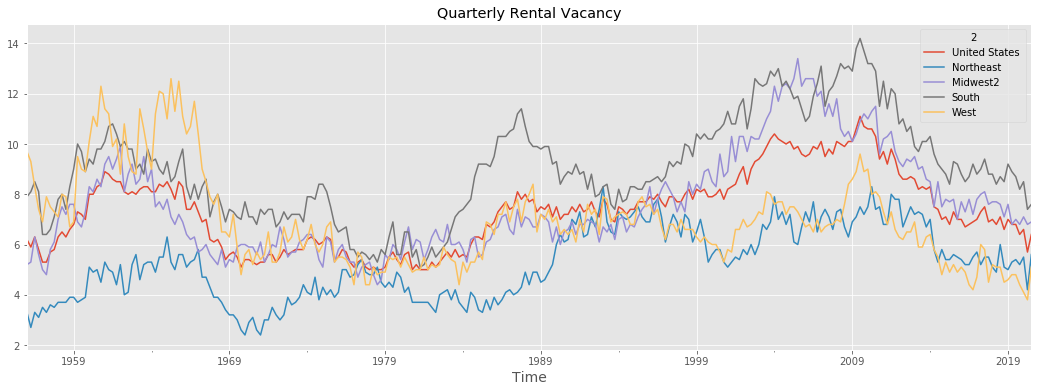

In [29]:
rental_vacancy.plot(figsize=(18,6))
plt.xlabel('Time', fontsize=14);
plt.title('Quarterly Rental Vacancy')

### Property values between 200k and 400k will be selected to make sure the properties aren't too large.

Having a larger quantities of smaller properties will allow the investors to diversify and keep their monthly revenue in the possible situation that they have an altercation at a property.

In [30]:
ny_under = ny[ny['value'] <= 400000]

In [31]:
ny_under = ny[ny['value'] >= 200000]

In [32]:
ny_under.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2012-01-01,10467,New York,NY,Bronx,306400.0
2012-01-01,11226,New York,NY,Kings,545300.0
2012-01-01,11375,New York,NY,Queens,687000.0
2012-01-01,11235,New York,NY,Kings,542400.0
2012-01-01,10011,New York,NY,New York,7103800.0


### Still, there are 528 zipcodes that meet the aforementioned criteria.

This is nearly half of New York, so it will need to be further narrowed.

In [33]:
ny_under.Zipcode.nunique()

528

### New York County Map

![SegmentLocal](new-york-county-map.gif "segment")

In [34]:
ny_under.CountyName.value_counts()

Suffolk        6566
Nassau         4788
Westchester    4619
Queens         4180
Kings          2128
Orange         1645
Rockland       1614
Dutchess       1603
Ulster          982
Bronx           964
Richmond        912
Saratoga        892
Columbia        833
Albany          680
Erie            624
Putnam          532
Warren          491
New York        456
Monroe          378
Rensselaer      226
Onondaga        179
Schenectady     116
Greene           86
Cattaraugus      76
Ontario          76
Chautauqua       76
Otsego           76
Herkimer         76
Tompkins         65
Madison          48
Sullivan         35
Name: CountyName, dtype: int64

### The data can be narrowed by population density.

![SegmentLocal](population-density "segment")

### Data from Kings County will be used. 

Kings County has both a high population density and also has a large amount of data available for modeling. The real estate investment company may also benefit by setting their headquarters outside of New York city to avoid exorbitant rent prices.

In [35]:
kings = ny_under[ny_under['CountyName'] == 'Kings'] 

In [36]:
kings.head()

,Zipcode,City,State,CountyName,value
time,,,,,
2012-01-01,11226,New York,NY,Kings,545300.0
2012-01-01,11235,New York,NY,Kings,542400.0
2012-01-01,11230,New York,NY,Kings,707400.0
2012-01-01,11209,New York,NY,Kings,690400.0
2012-01-01,11212,New York,NY,Kings,254500.0


### Unique zipcodes in the dataset can be identified.

In [37]:
kings_codes = kings.Zipcode.unique()

In [38]:
kings_codes.size

28

In [39]:
kings_codes

array([11226, 11235, 11230, 11209, 11212, 11214, 11221, 11229, 11234,
       11215, 11211, 11238, 11233, 11236, 11218, 11223, 11208, 11204,
       11219, 11203, 11220, 11216, 11210, 11224, 11222, 11205, 11217,
       11228])

In [40]:
kings.drop(columns= ['City', 'State', 'CountyName'], inplace = True)


In [41]:
kings.head()

,Zipcode,value
time,,
2012-01-01,11226,545300.0
2012-01-01,11235,542400.0
2012-01-01,11230,707400.0
2012-01-01,11209,690400.0
2012-01-01,11212,254500.0


In [42]:
kings_grouped = kings.groupby(['Zipcode'], as_index = True).resample('M').sum()

In [43]:
kings_grouped.head()

Zipcode     value
Zipcode time                         
11203   2012-01-31    11203  333500.0
        2012-02-29    11203  335300.0
        2012-03-31    11203  338100.0
        2012-04-30    11203  339400.0
        2012-05-31    11203  339300.0

In [44]:
kings_grouped.rename({'Zipcode': 'Zip'}, inplace = True)

In [45]:
kings_grouped.head()

Zipcode     value
Zipcode time                         
11203   2012-01-31    11203  333500.0
        2012-02-29    11203  335300.0
        2012-03-31    11203  338100.0
        2012-04-30    11203  339400.0
        2012-05-31    11203  339300.0

In [46]:
kings_grouped.drop(columns = 'Zipcode', inplace = True)

In [47]:
kings_grouped.head()

value
Zipcode time                
11203   2012-01-31  333500.0
        2012-02-29  335300.0
        2012-03-31  338100.0
        2012-04-30  339400.0
        2012-05-31  339300.0

In [48]:
kings_codes = kings['Zipcode'].unique().tolist()
len(kings_codes)

28

In [49]:
kings_codes

[11226,
 11235,
 11230,
 11209,
 11212,
 11214,
 11221,
 11229,
 11234,
 11215,
 11211,
 11238,
 11233,
 11236,
 11218,
 11223,
 11208,
 11204,
 11219,
 11203,
 11220,
 11216,
 11210,
 11224,
 11222,
 11205,
 11217,
 11228]

### Every zipcode has the same amount of values so train test values can be sliced at the same points. 

In [50]:
kings.Zipcode.value_counts()

11238    76
11236    76
11205    76
11209    76
11211    76
11215    76
11217    76
11219    76
11221    76
11223    76
11229    76
11233    76
11235    76
11204    76
11208    76
11210    76
11212    76
11214    76
11216    76
11218    76
11220    76
11222    76
11224    76
11226    76
11228    76
11230    76
11234    76
11203    76
Name: Zipcode, dtype: int64

# ARIMA Modeling 28 New York State Zipcodes

### ACF & PACF

This function can be used to plot the time series, autocorrelation function, and partial autocorrelation function. 

In [51]:
# acf and pacf function

def plot_acf_pacf(ts, figsize=(10,8), lags = 24, zipcode = 'add'):
    
    fig,ax = plt.subplots(nrows=3,
                         figsize = figsize)
    
    #plot time series
    ts.plot(ax=ax[0])
    
    #plot acf, pacf
    plot_acf(ts,ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags)
    fig.tight_layout()
    
    fig.suptitle(f'Zipcode: {zipcode}',y=1.1, fontsize=20)
    
    for a in ax[1:]:
        a.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(min_n_ticks=lags, integer = True))
        a.xaxis.grid()
    return fig,ax


### 11226

In [53]:
two_two_six = kings_grouped.loc[11226]

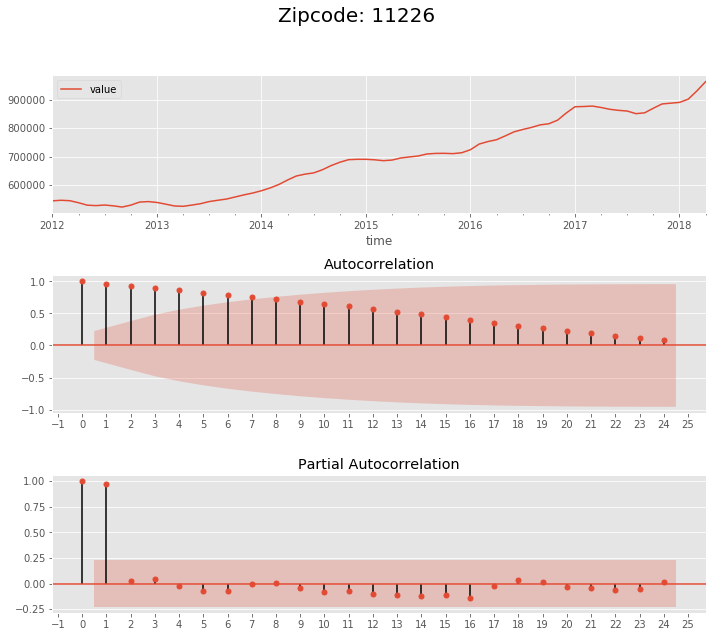

In [54]:
plot_acf_pacf(two_two_six, zipcode = '11226')
plt.show()

### Decompose Time Series

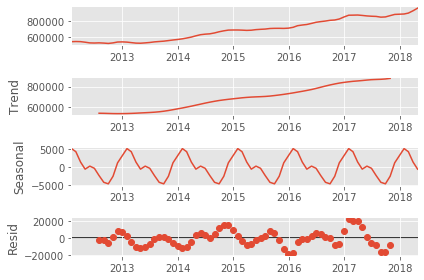

In [56]:
decompose_result = seasonal_decompose(two_two_six, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function

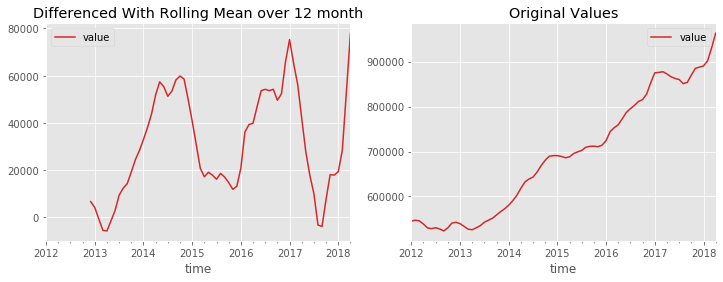

In [58]:
rolling_mean = two_two_six.rolling(window = 12).mean()
two_two_six_rolled_detrended = two_two_six - rolling_mean

ax1 = plt.subplot(121)
two_two_six_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
two_two_six.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

Stationarity is present.

In [63]:
dftest = adfuller(two_two_six_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.53956441423776
2. P-Value :  0.00702726895573602
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


In [64]:
two_two_six = two_two_six_rolled_detrended

# ARIMA Modeling

### Parameter Selection

In [65]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [66]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(two_two_six,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [67]:
# Find the parameters with minimal AIC value
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           1006.42
Name: 59, dtype: object

### Fitting the Time Series Model - ARIMA

These p-values do not meet the threshold of .05.

In [70]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(two_two_six, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5335      0.371      1.439      0.150      -0.193       1.260
ma.L1          0.5045      0.390      1.293      0.196      -0.260       1.269
ma.S.L12      -1.0628      0.350     -3.033      0.002      -1.750      -0.376
sigma2       6.79e+07   5.56e-09   1.22e+16      0.000    6.79e+07    6.79e+07


### Plot Diagnostics

1. top-left: Seems like it may be displaying seasonality. 
2. top-right: Seems to be normally distributed.
3. bottom-left: Slightly meanders from the line. 
4. bottom right: Positive values may indicate a missed seasonal component.

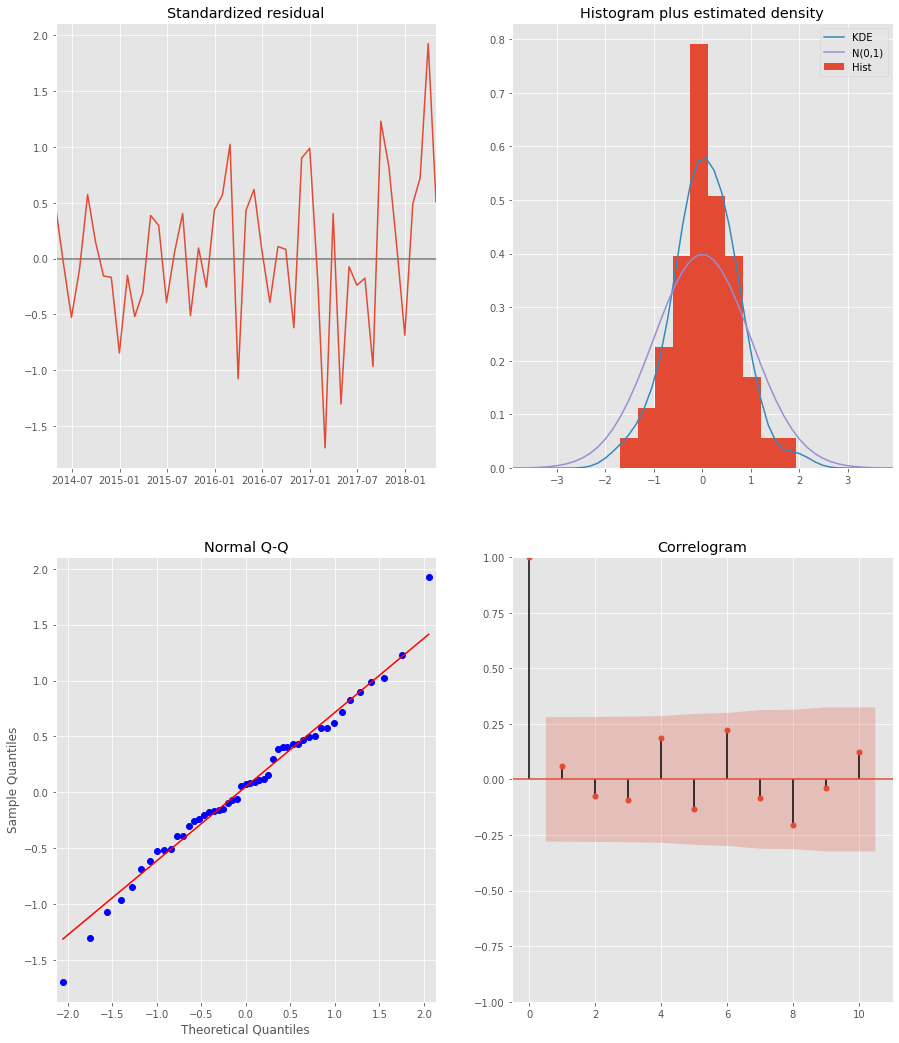

In [71]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [72]:
two_two_six[60:]

,value
time,
2017-01-31,75250.000000
2017-02-28,65175.000000
2017-03-31,56300.000000
2017-04-30,41883.333333
2017-05-31,27816.666667
2017-06-30,17833.333333
2017-07-31,10041.666667
2017-08-31,-3183.333333
2017-09-30,-3808.333333


In [73]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

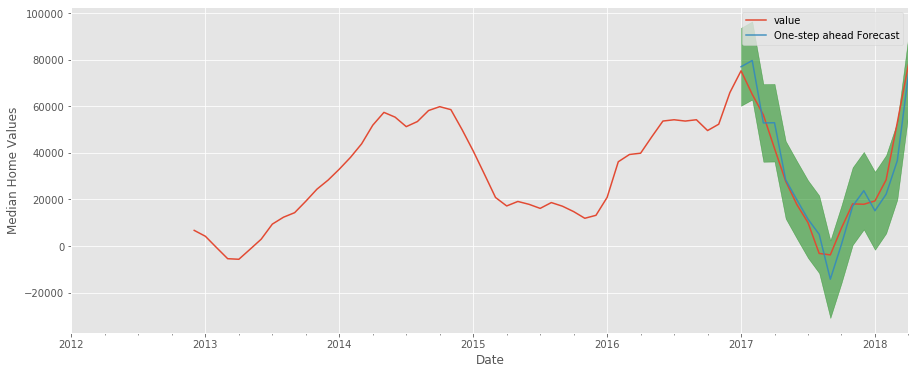

In [74]:

rcParams['figure.figsize'] = 15, 6

ax = two_two_six['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [75]:
val_forecasted = pred.predicted_mean
val_truth = two_two_six.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 59755218.11


### Model Validation - Dynamic Forecasting

In [76]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


In [77]:
two_two_six.head()

,value
time,
2012-01-31,NaN
2012-02-29,NaN
2012-03-31,NaN
2012-04-30,NaN
2012-05-31,NaN


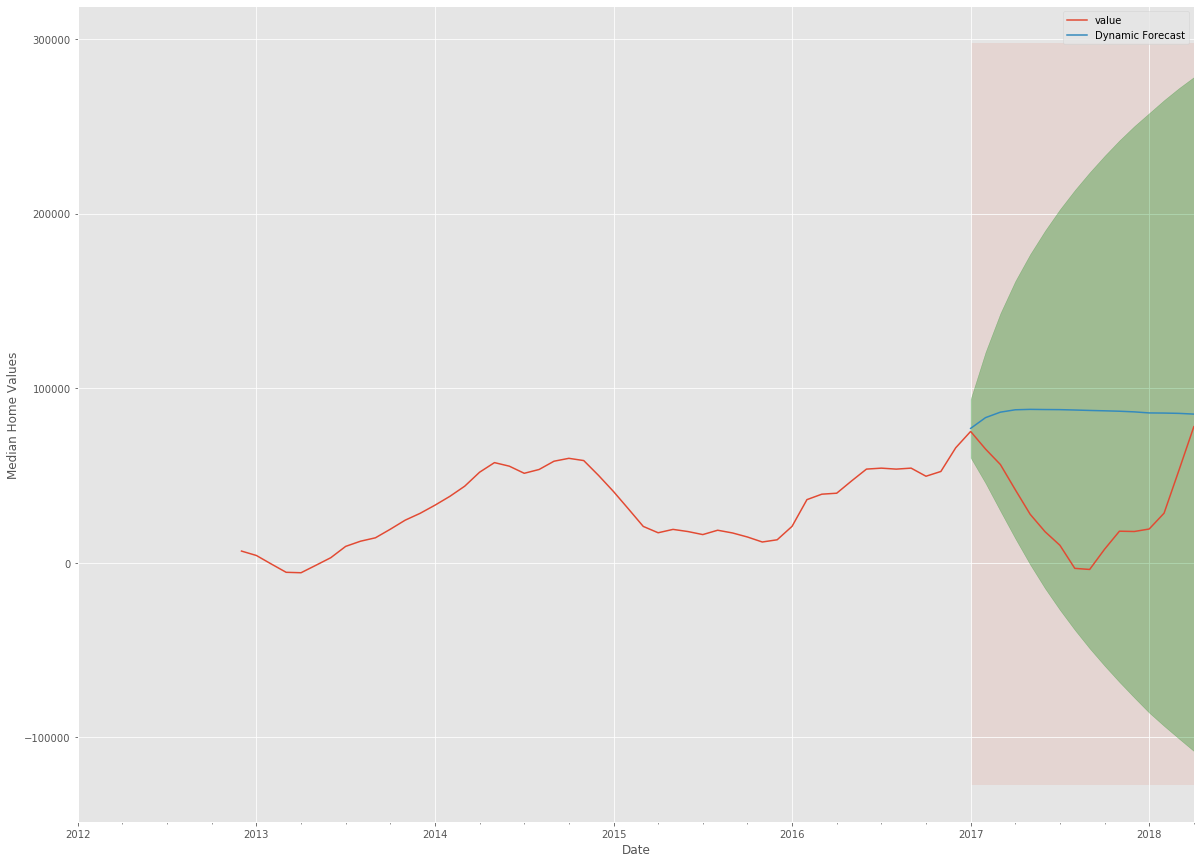

In [78]:
ax = two_two_six['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [79]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = two_two_six.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3682578137.26


### Visualizing Confidence Interval

In [82]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

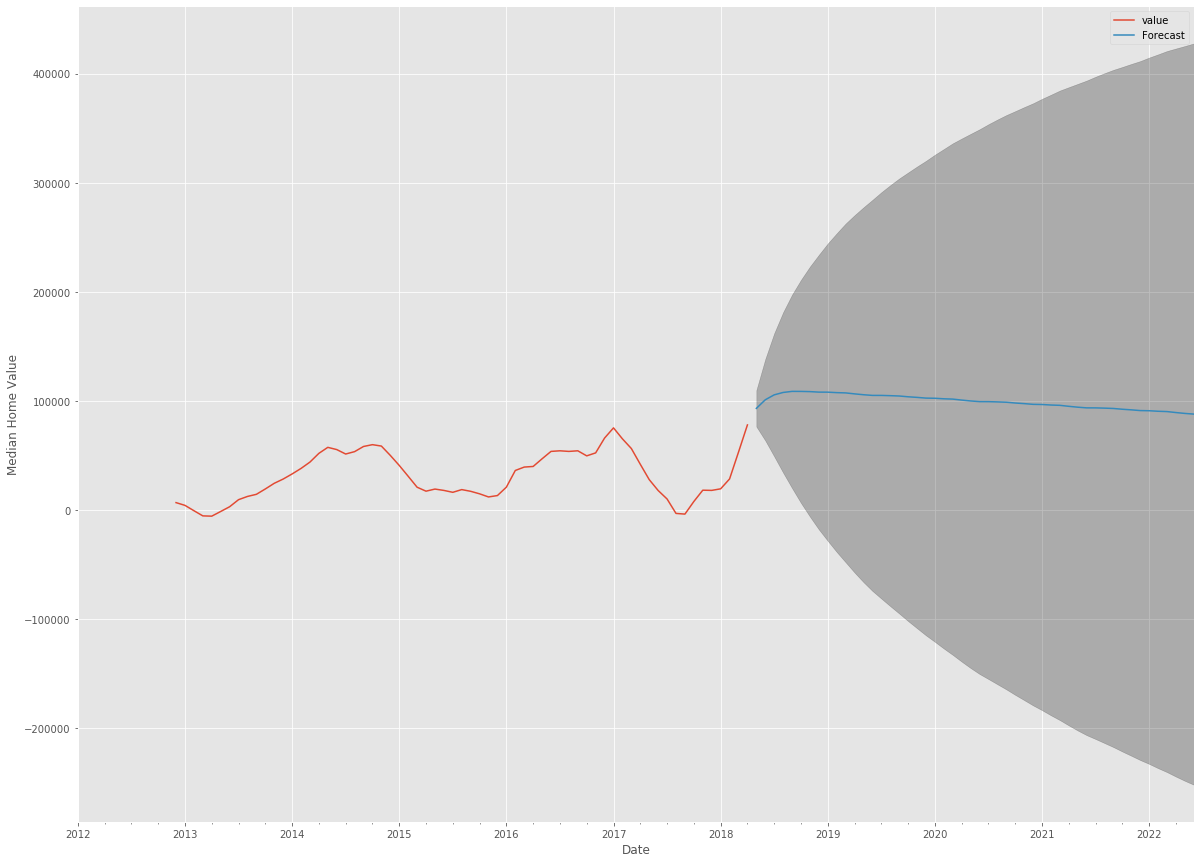

In [83]:
ax = two_two_six.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

### 11226 Conclusion: Not optimal.

### 11235

In [85]:
two_three_five = kings_grouped.loc[11235]

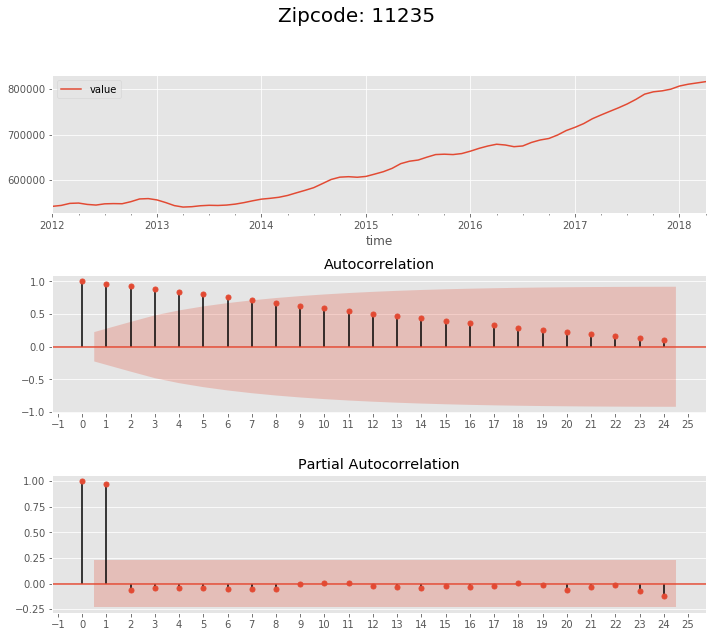

In [86]:
plot_acf_pacf(two_three_five, zipcode = '11235')
plt.show()

### Decompose Time Series

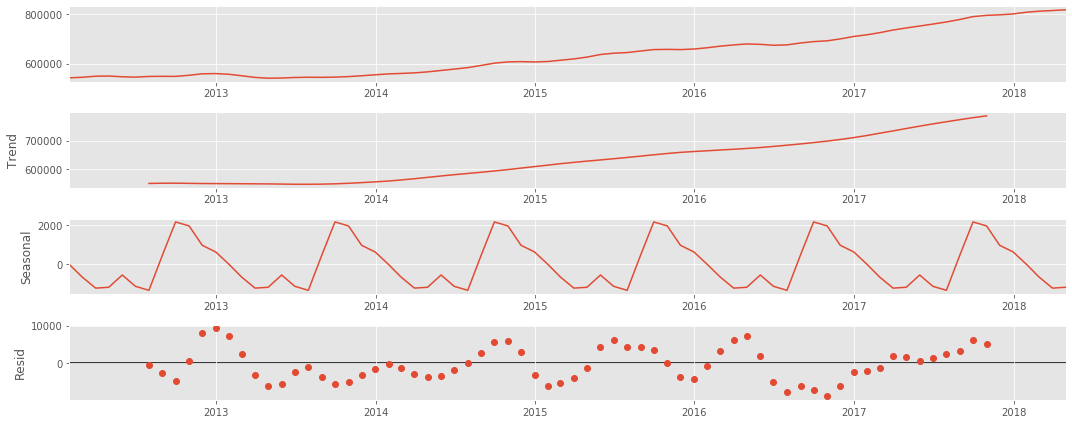

In [87]:
decompose_result = seasonal_decompose(two_three_five, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function (Mean Rolled)

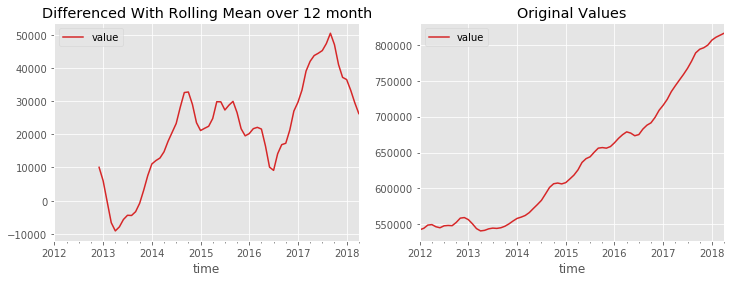

In [88]:
rolling_mean = two_three_five.rolling(window = 12).mean()
two_three_five_rolled_detrended = two_three_five - rolling_mean

ax1 = plt.subplot(121)
two_three_five_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
two_three_five.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

Stationarity is not present.

In [89]:
dftest = adfuller(two_three_five_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.5365079692073444
2. P-Value :  0.10684229707301357
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 54
5. Critical Values :
	 1% :  -3.55770911573439
	 5% :  -2.9167703434435808
	 10% :  -2.59622219478738


### Using Differencing with Mean Rolled Time Series for Seasonality

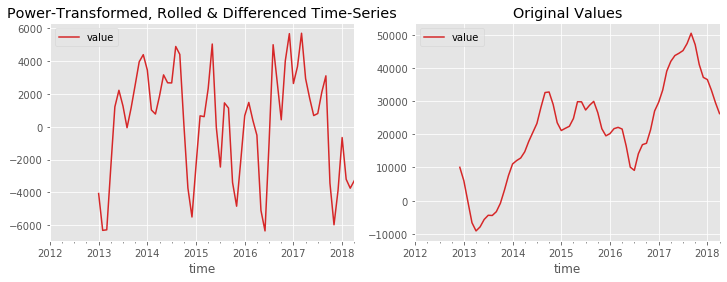

In [91]:
two_three_five_rolled_detrended_diff = two_three_five_rolled_detrended - two_three_five_rolled_detrended.shift()

ax1 = plt.subplot(121)
two_three_five_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
two_three_five_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [93]:
two_three_five = two_three_five_rolled_detrended_diff

### Retesting with the Dicky-Fuller Test

Technically this is still does not have stationarity.

In [94]:
dftest = adfuller(two_three_five.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.6296107222313245
2. P-Value :  0.08703044726661008
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 52
5. Critical Values :
	 1% :  -3.562878534649522
	 5% :  -2.918973284023669
	 10% :  -2.597393446745562


### Parameter Selection

In [95]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [96]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(two_three_five, 
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [97]:
# Find the parameters with minimal AIC value
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic           912.416
Name: 27, dtype: object

### Fitting the Time Series Model - ARIMA

In [98]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(two_three_five, 
                                        order=(0, 1, 1), 
                                        seasonal_order=(0, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5967      0.135      4.437      0.000       0.333       0.860
ma.S.L12      -1.2738      0.356     -3.577      0.000      -1.972      -0.576
sigma2      4.068e+06   2.34e+06      1.740      0.082   -5.14e+05    8.65e+06


### Plot Diagnostics

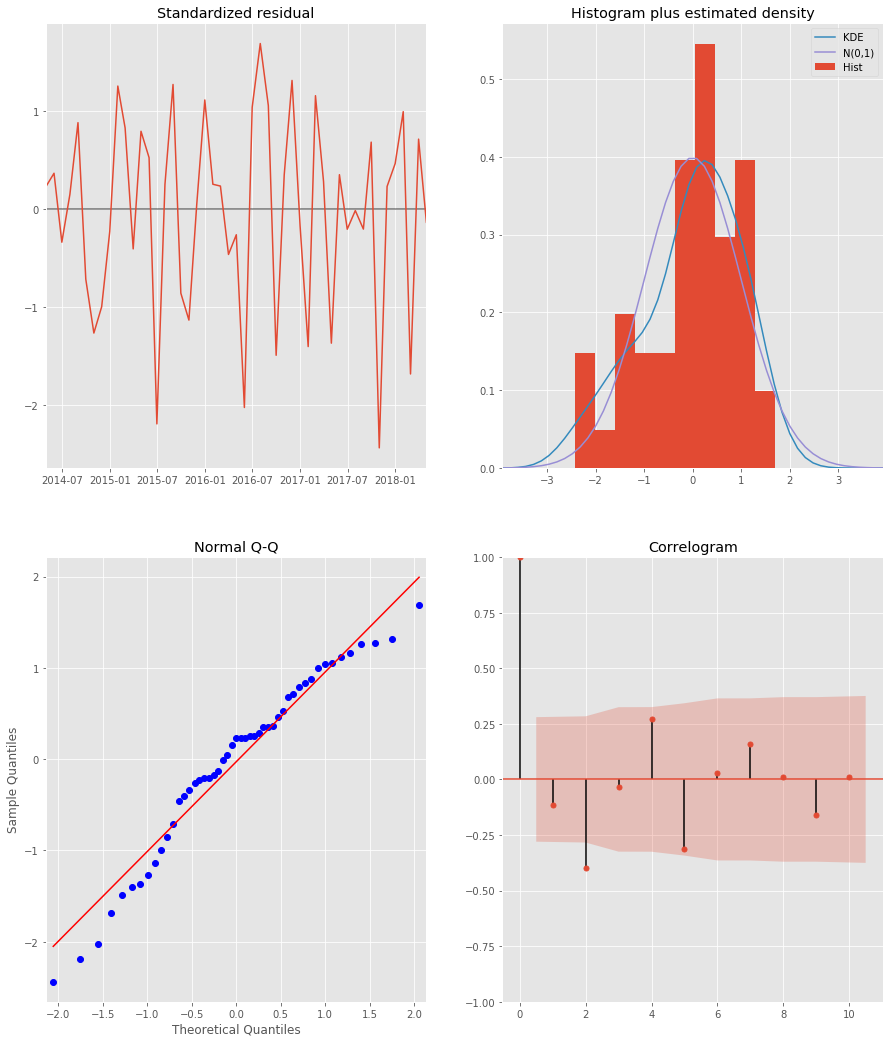

In [99]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [100]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

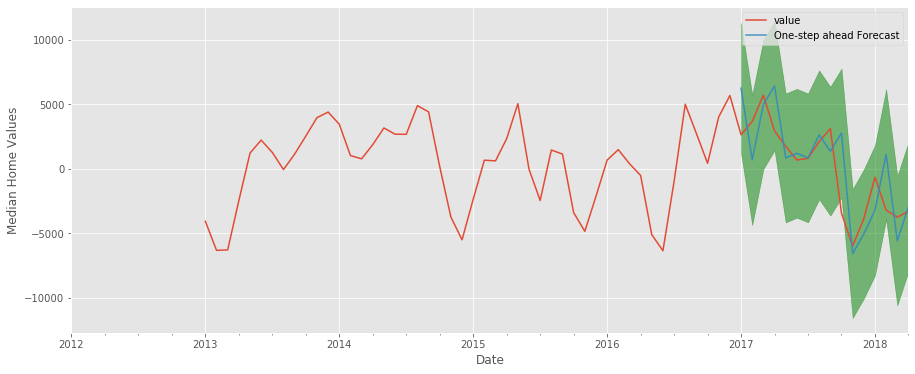

In [101]:

rcParams['figure.figsize'] = 15, 6

ax = two_three_five['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [102]:
val_forecasted = pred.predicted_mean
val_truth = two_three_five.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 6760389.32


### Model Validation - Dynamic Forecasting

In [103]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()


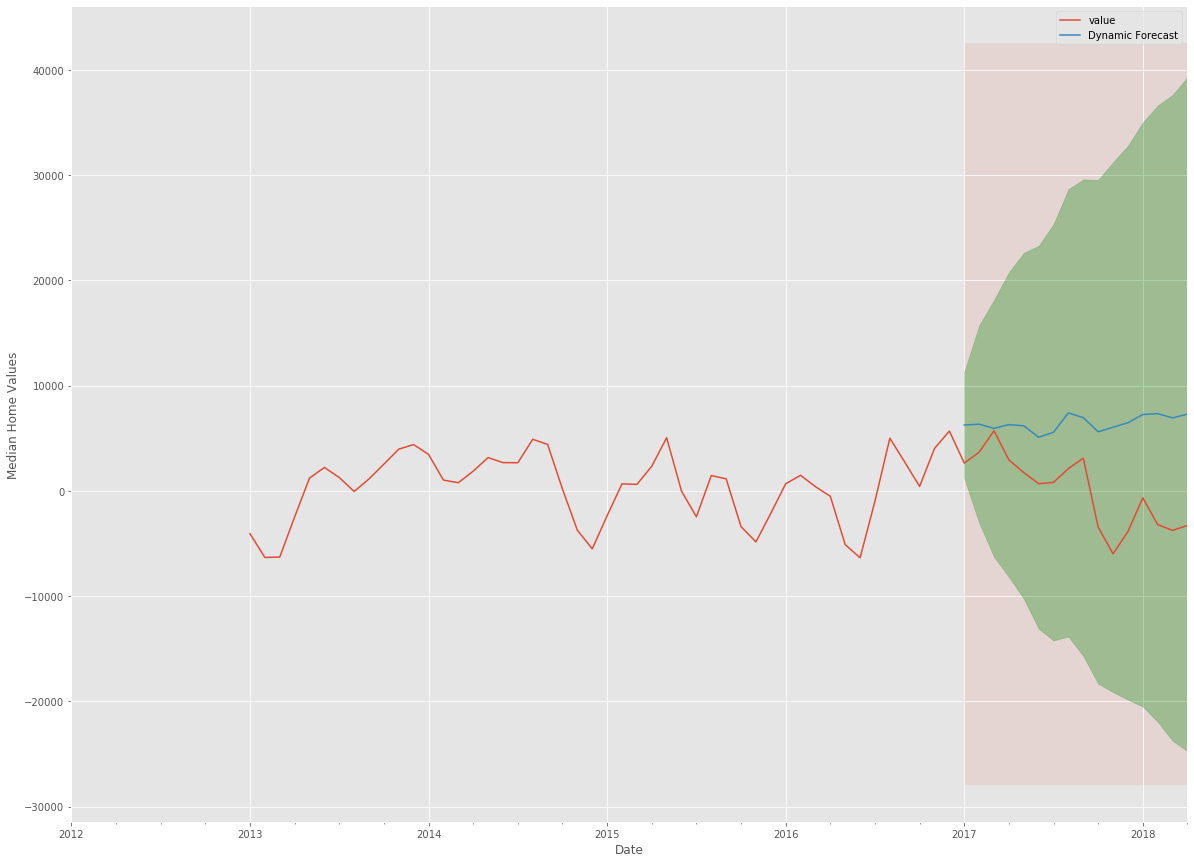

In [104]:
ax = two_three_five['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [105]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = two_three_five.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 54377031.69


### Visualizing Confidence Interval

In [106]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

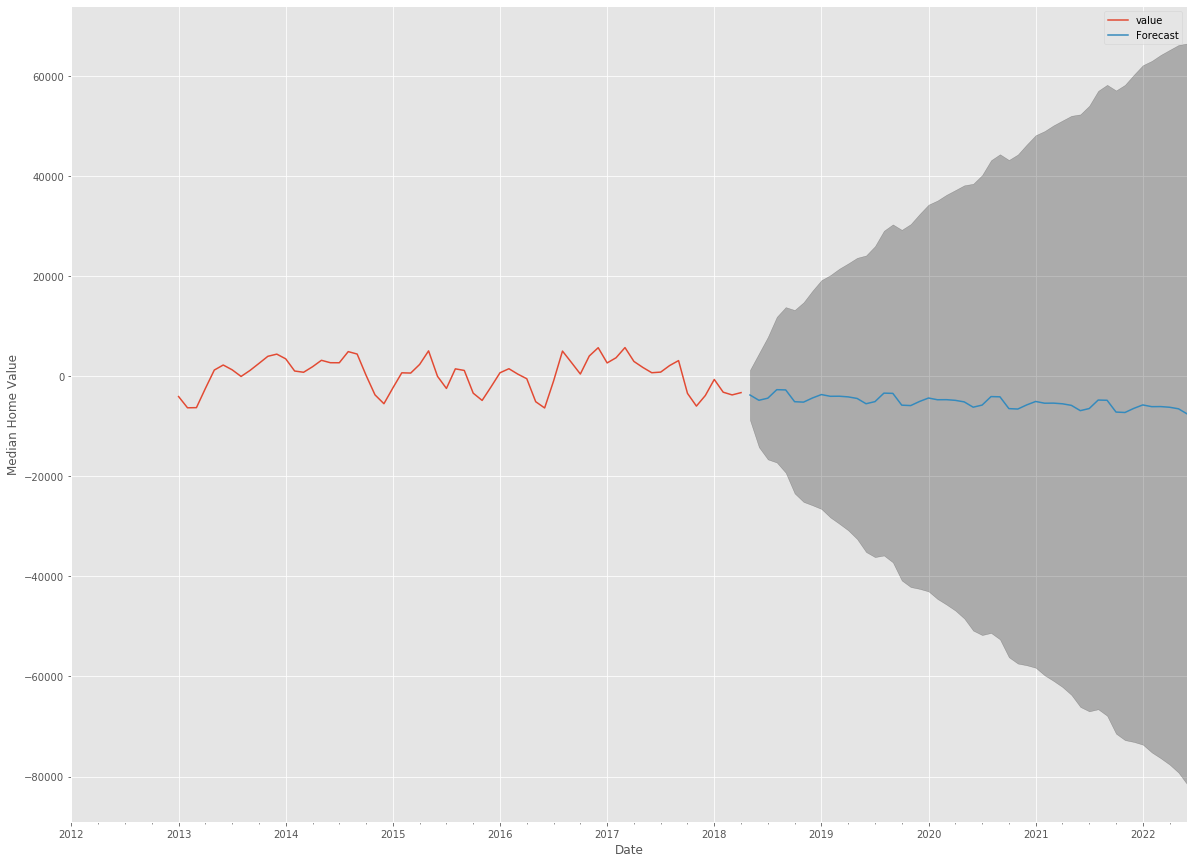

In [107]:
ax = two_three_five.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

### 11235 Conclusion: Not Optimal

### 11230

In [108]:
two_three_zero = kings_grouped.loc[11230]

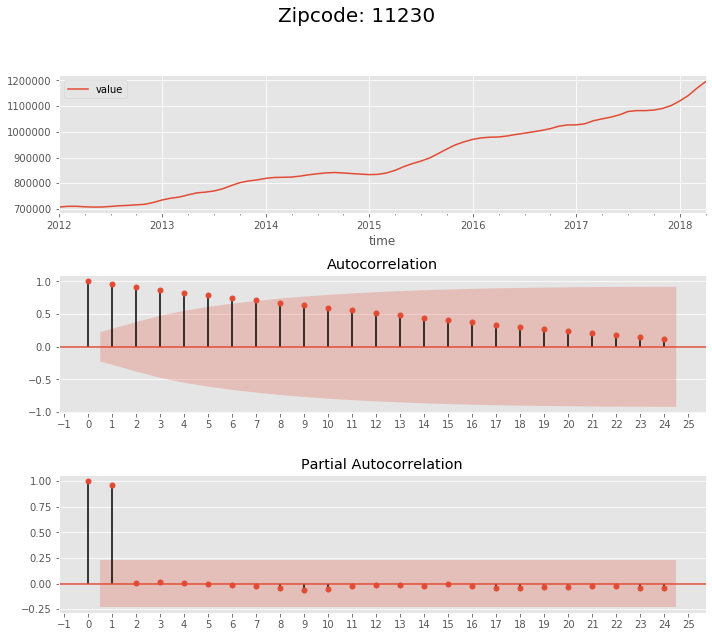

In [109]:
plot_acf_pacf(two_three_zero, zipcode = '11230')
plt.show()

### Decompose Time Series

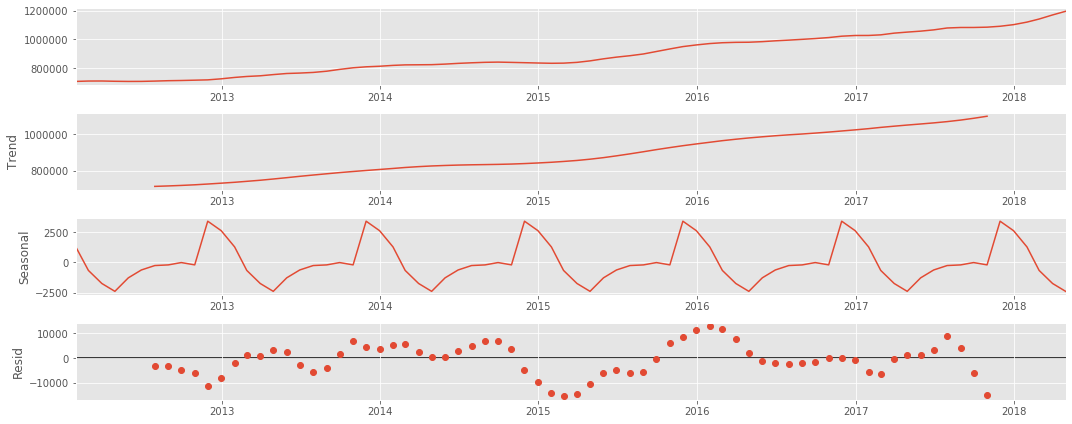

In [117]:
decompose_result = seasonal_decompose(two_three_zero, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function (Mean Rolled)

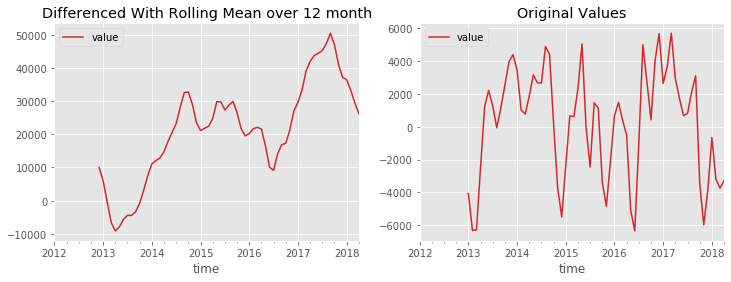

In [118]:
rolling_mean = two_three_zero.rolling(window = 12).mean()
two_three_zero_rolled_detrended = two_three_zero - rolling_mean

ax1 = plt.subplot(121)
two_three_five_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
two_three_five.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

Stationarity is not present.

In [119]:
dftest = adfuller(two_three_zero_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.0488954584821033
2. P-Value :  0.26555387268322084
3. Num Of Lags :  6
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 58
5. Critical Values :
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944


### Using Differencing with Mean Rolled Time Series for Seasonality

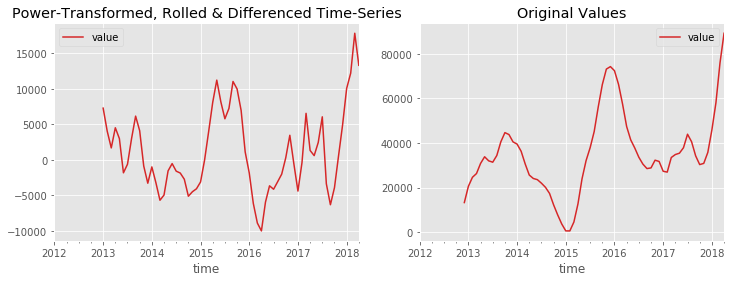

In [120]:
two_three_zero_rolled_detrended_diff = two_three_zero_rolled_detrended - two_three_zero_rolled_detrended.shift()

ax1 = plt.subplot(121)
two_three_zero_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
two_three_zero_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [121]:
two_three_zero = two_three_zero_rolled_detrended_diff

### Retesting with the Dicky-Fuller Test

Technically this is still does not have stationarity.

In [122]:
dftest = adfuller(two_three_zero.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.3593881503061795
2. P-Value :  0.15352829532583095
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 58
5. Critical Values :
	 1% :  -3.548493559596539
	 5% :  -2.912836594776334
	 10% :  -2.594129155766944


### Parameter Selection

In [123]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [124]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(two_three_zero, 
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [125]:
# Find the parameters with minimal AIC value
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (0, 1, 1, 12)
aic           938.885
Name: 59, dtype: object

### Fitting the Time Series Model - ARIMA

In [126]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(two_three_zero, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(0, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0960      0.331     -0.290      0.772      -0.745       0.553
ma.L1          0.5741      0.307      1.871      0.061      -0.027       1.176
ma.S.L12      -1.3026      0.165     -7.910      0.000      -1.625      -0.980
sigma2      7.373e+06   1.65e-08   4.46e+14      0.000    7.37e+06    7.37e+06


### Plot Diagnostics


1. top-left: Seems like random noise more than seasonality. 
2. top-right: Seems to be normally distributed.
3. bottom-left: Mostly adheres to the line.
4. bottom right: Positive values may indicate a missed seasonal component.

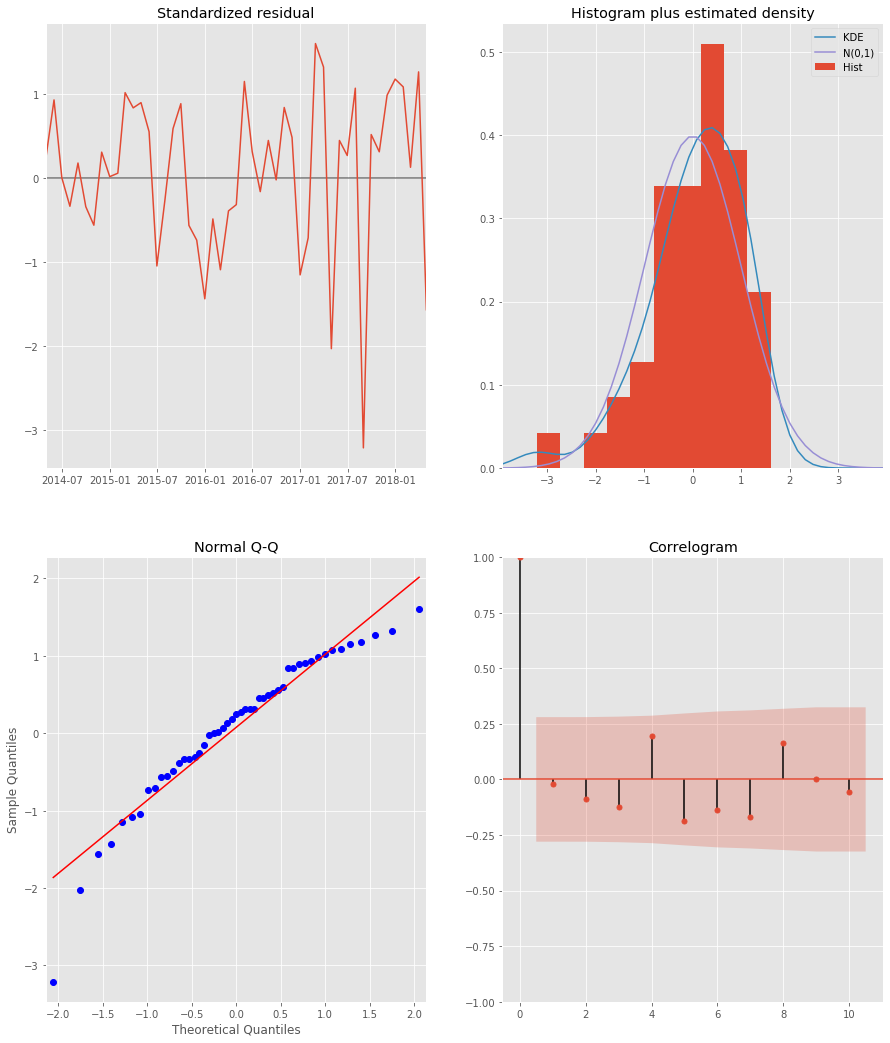

In [127]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [128]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

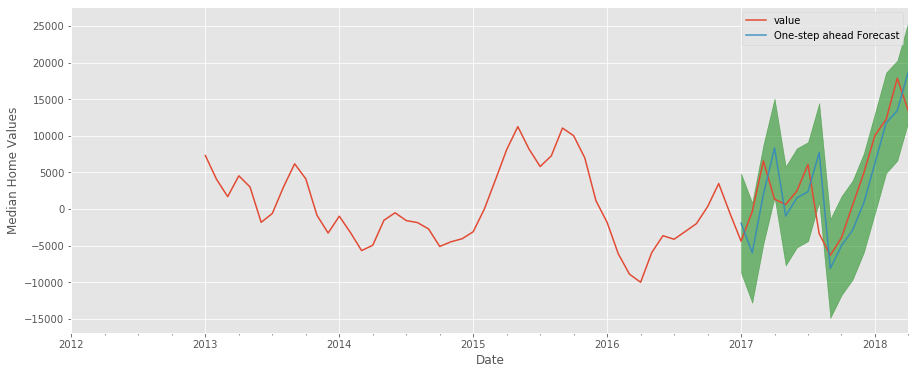

In [129]:

rcParams['figure.figsize'] = 15, 6

ax = two_three_zero['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [130]:
val_forecasted = pred.predicted_mean
val_truth = two_three_zero.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 21493140.26


### Model Validation - Dynamic Forecasting

In [131]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

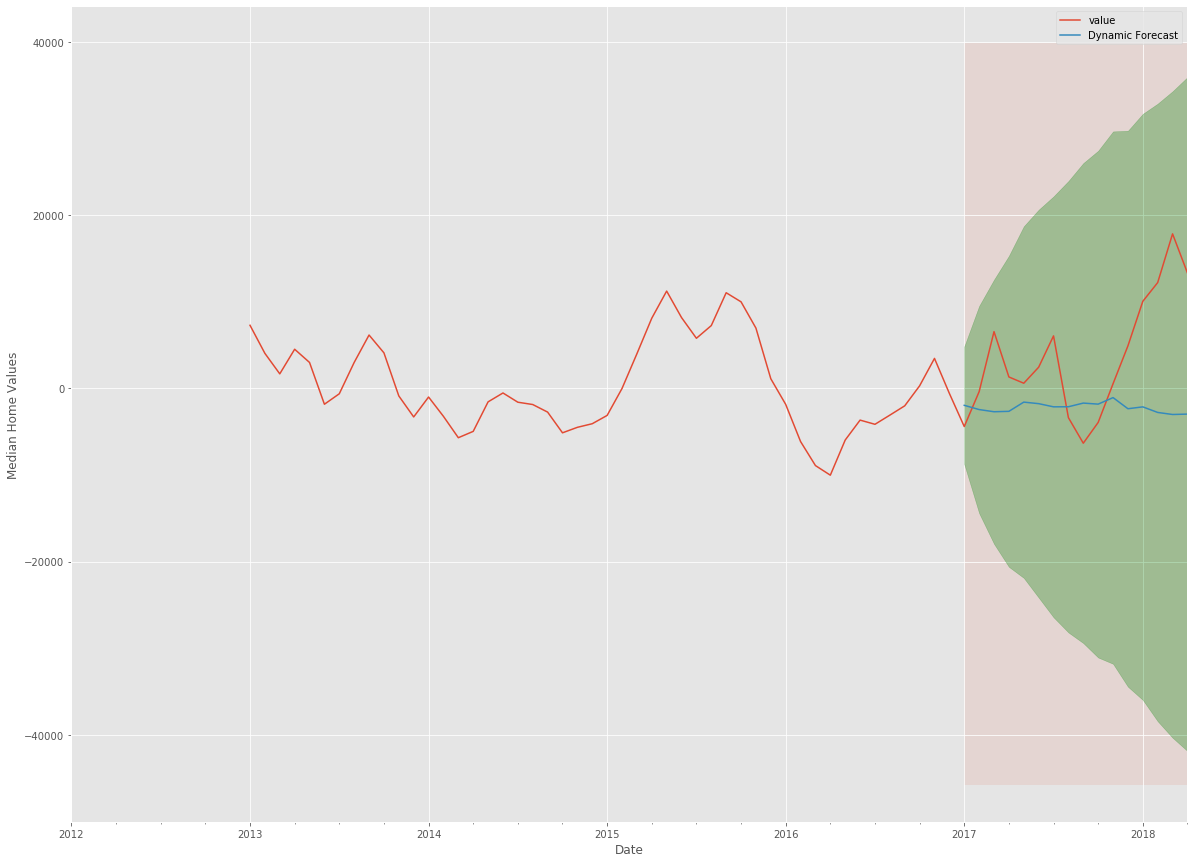

In [132]:
ax = two_three_zero['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [133]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = two_three_zero.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 84881441.65


### Visualizing Confidence Interval

In [134]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

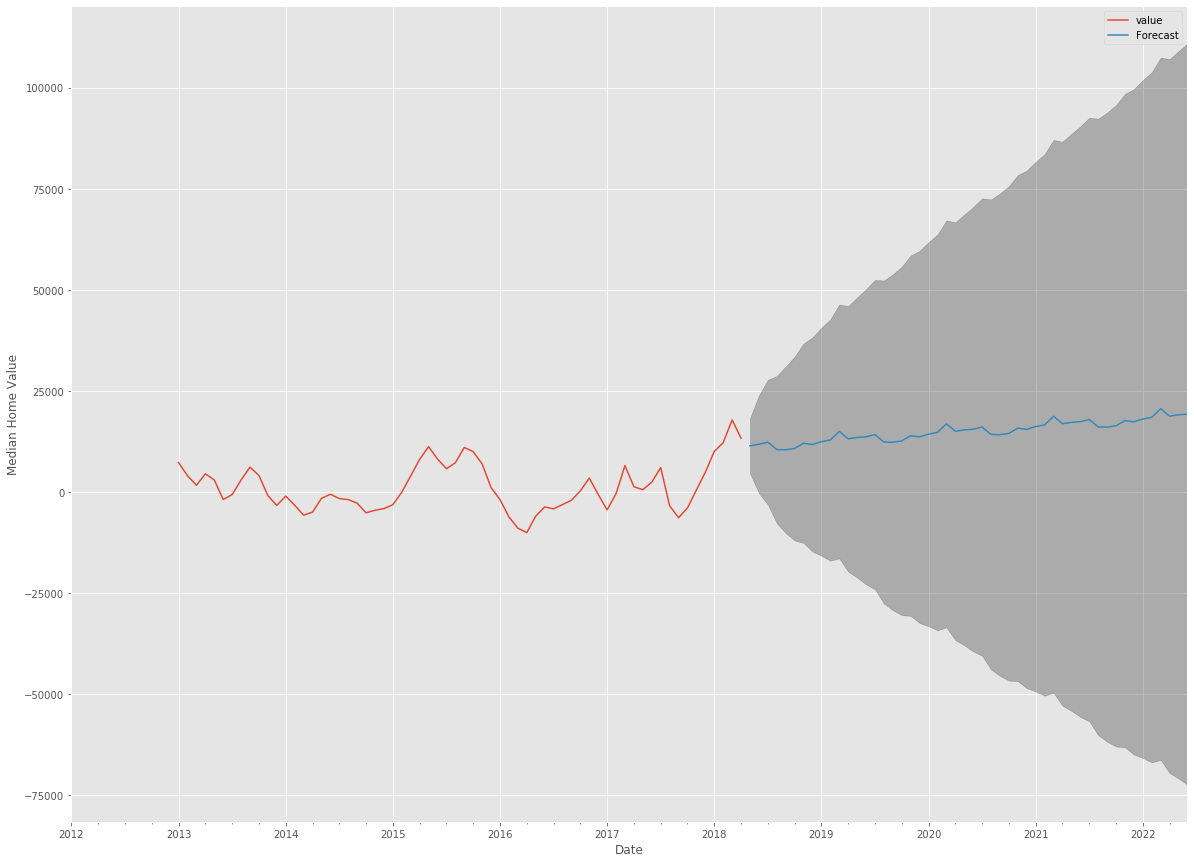

In [135]:
ax = two_three_zero.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

### 11230 Conclusion: Not Optimal

### 11209

In [137]:
two_zero_nine = kings_grouped.loc[11209]

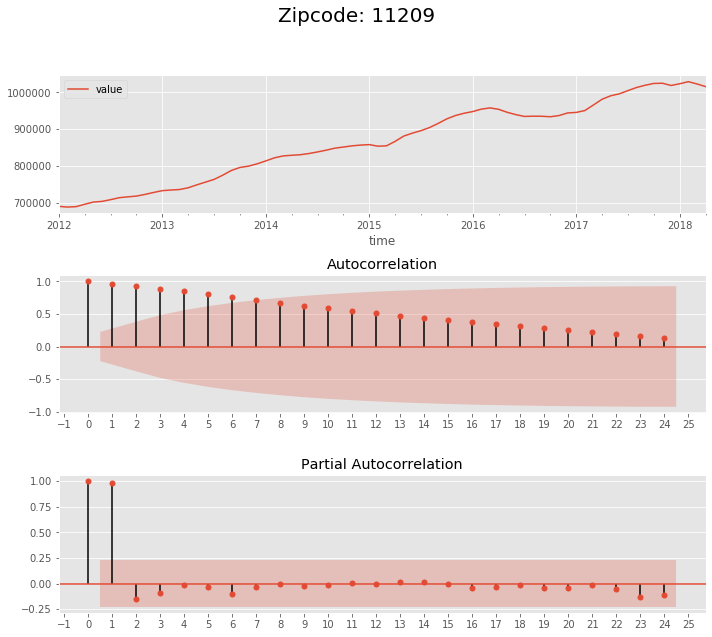

In [138]:
plot_acf_pacf(two_zero_nine, zipcode = '11209')
plt.show()

### Decompose Time Series

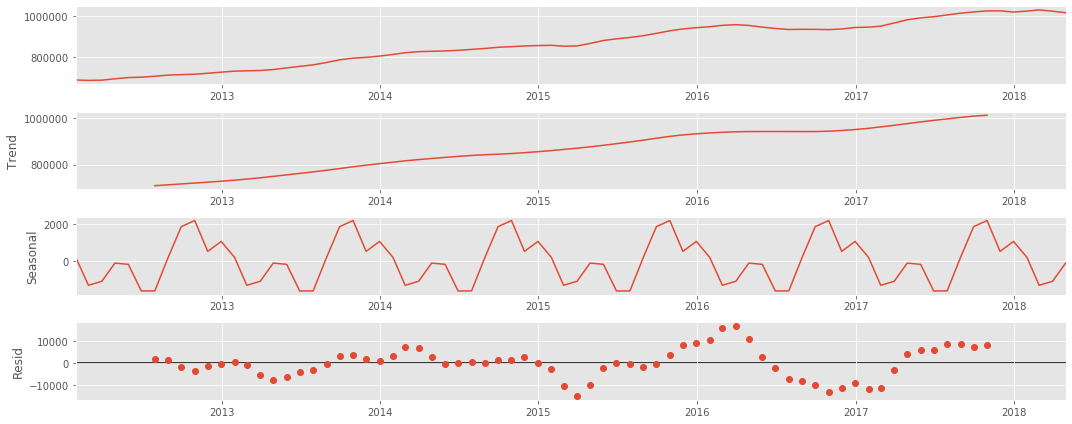

In [139]:
decompose_result = seasonal_decompose(two_zero_nine, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function (Mean Rolled)

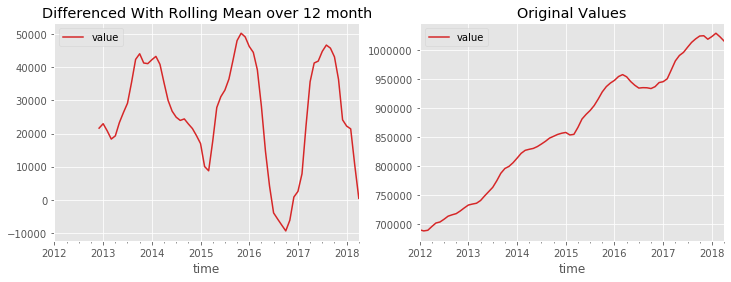

In [140]:
rolling_mean = two_zero_nine.rolling(window = 12).mean()
two_zero_nine_rolled_detrended = two_zero_nine - rolling_mean

ax1 = plt.subplot(121)
two_zero_nine_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
two_zero_nine.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

Stationarity is not present.

In [141]:
dftest = adfuller(two_zero_nine_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -5.370966289251141
2. P-Value :  3.896739979818044e-06
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


### Using Differencing with Mean Rolled Time Series for Seasonality

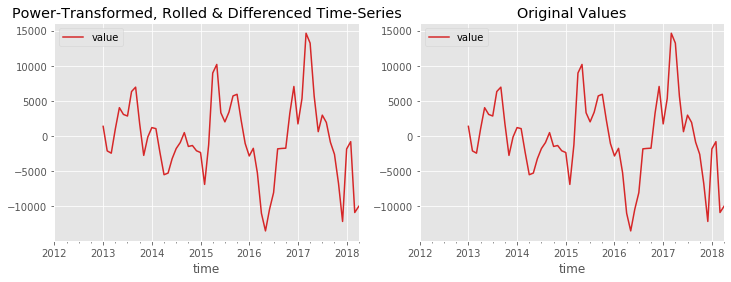

In [142]:
two_zero_nine_rolled_detrended_diff = two_zero_nine_rolled_detrended - two_zero_nine_rolled_detrended.shift()

ax1 = plt.subplot(121)
two_zero_nine_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
two_zero_nine_rolled_detrended_diff.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [143]:
two_three_five = two_three_five_rolled_detrended_diff

### Retesting with the Dicky-Fuller Test

Technically this is still does not have stationarity.

In [144]:
dftest = adfuller(two_three_five.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.6296107222313245
2. P-Value :  0.08703044726661008
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 52
5. Critical Values :
	 1% :  -3.562878534649522
	 5% :  -2.918973284023669
	 10% :  -2.597393446745562


### Decompose Time Series

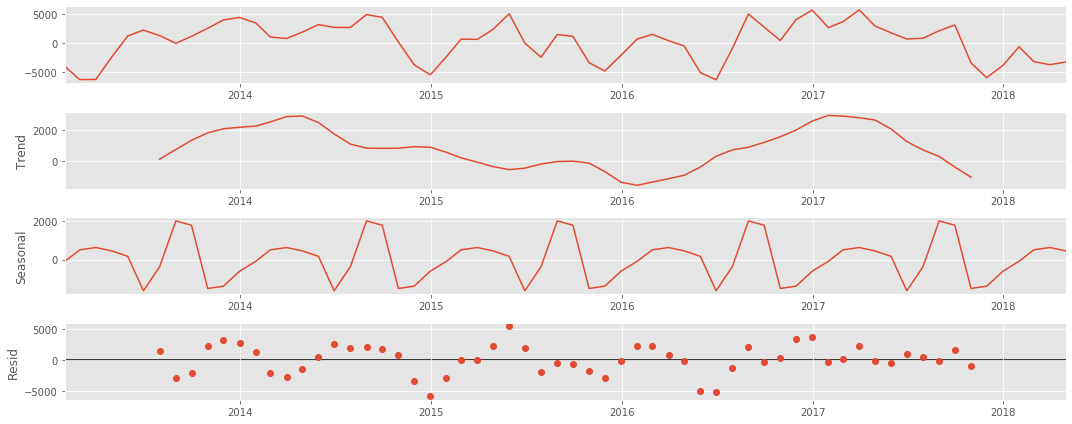

In [147]:
decompose_result = seasonal_decompose(two_three_five.dropna(), model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function (Mean Rolled)

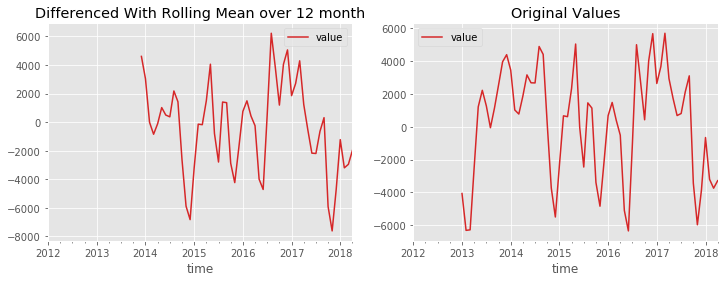

In [148]:
rolling_mean = two_three_five.rolling(window = 12).mean()
two_three_five_rolled_detrended = two_three_five - rolling_mean

ax1 = plt.subplot(121)
two_three_five_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
two_three_five.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

Stationarity is not present.

In [149]:
dftest = adfuller(two_three_five_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.8412965687533993
2. P-Value :  0.05261267236814974
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 49
5. Critical Values :
	 1% :  -3.5714715250448363
	 5% :  -2.922629480573571
	 10% :  -2.5993358475635153


### Using Differencing with Mean Rolled Time Series for Seasonality

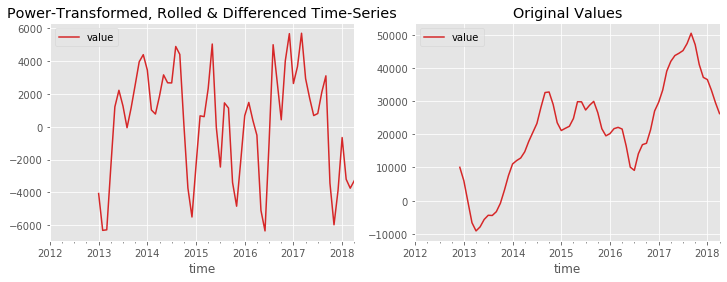

In [91]:
two_three_five_rolled_detrended_diff = two_three_five_rolled_detrended - two_three_five_rolled_detrended.shift()

ax1 = plt.subplot(121)
two_three_five_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
two_three_five_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [93]:
two_three_five = two_three_five_rolled_detrended_diff

### Retesting with the Dicky-Fuller Test

Technically this is still does not have stationarity.

In [94]:
dftest = adfuller(two_three_five.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -2.6296107222313245
2. P-Value :  0.08703044726661008
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 52
5. Critical Values :
	 1% :  -3.562878534649522
	 5% :  -2.918973284023669
	 10% :  -2.597393446745562


### Parameter Selection

In [150]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [151]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(two_zero_nine, 
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [152]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic           975.199
Name: 63, dtype: object

### Fitting the Time Series Model - ARIMA

In [153]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(two_zero_nine, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7075      0.209      3.381      0.001       0.297       1.118
ma.L1         -0.1558      0.205     -0.759      0.448      -0.558       0.246
ar.S.L12      -0.9729      0.150     -6.481      0.000      -1.267      -0.679
ma.S.L12      -0.0008      0.025     -0.033      0.974      -0.051       0.049
sigma2      3.252e+07   1.31e-09   2.49e+16      0.000    3.25e+07    3.25e+07


### Plot Diagnostics

1. top-left: Seems like random noise more than seasonality. 
2. top-right: Seems to be normally distributed.
3. bottom-left: Mostly adheres to the line.
4. bottom right: Positive values may indicate a missed seasonal component.

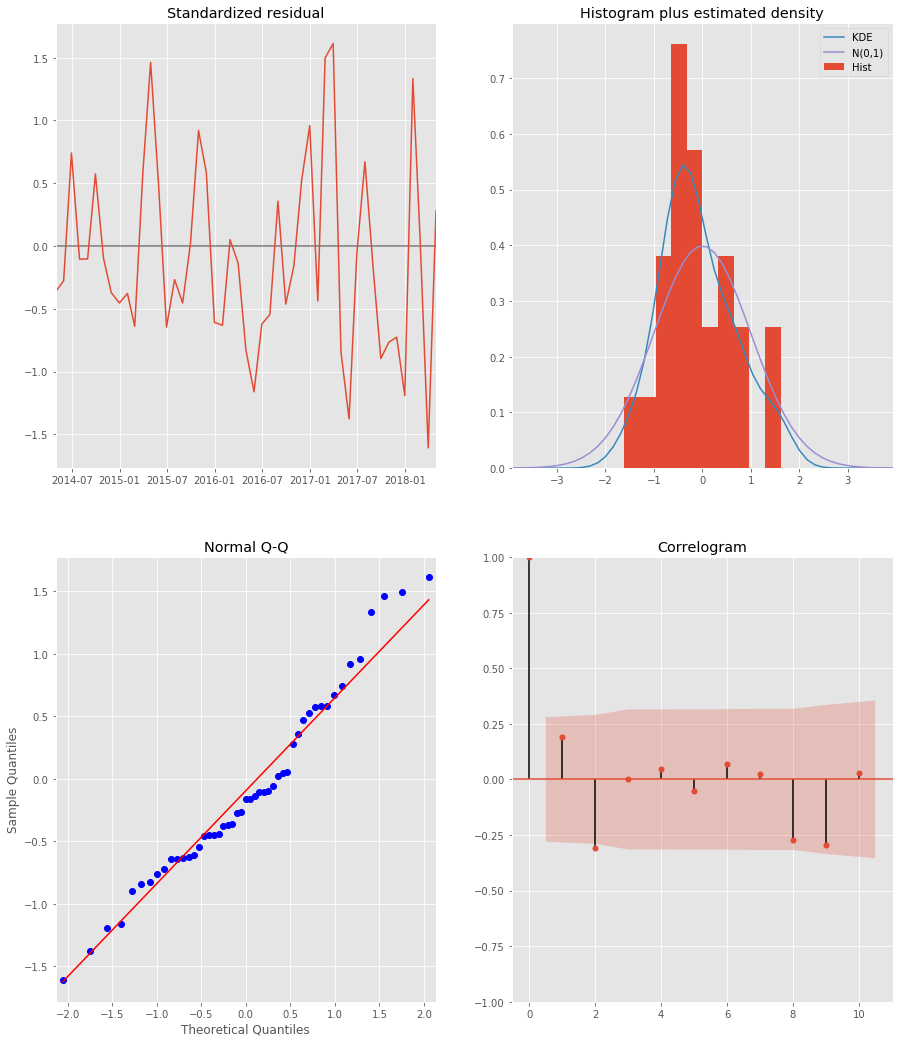

In [155]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [156]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

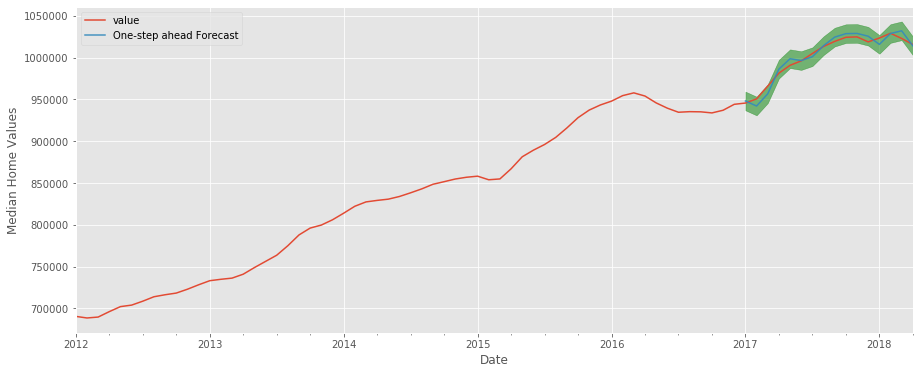

In [157]:

rcParams['figure.figsize'] = 15, 6

ax = two_zero_nine['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [158]:
val_forecasted = pred.predicted_mean
val_truth = two_zero_nine.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 32331374.25


### Model Validation - Dynamic Forecasting

In [159]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

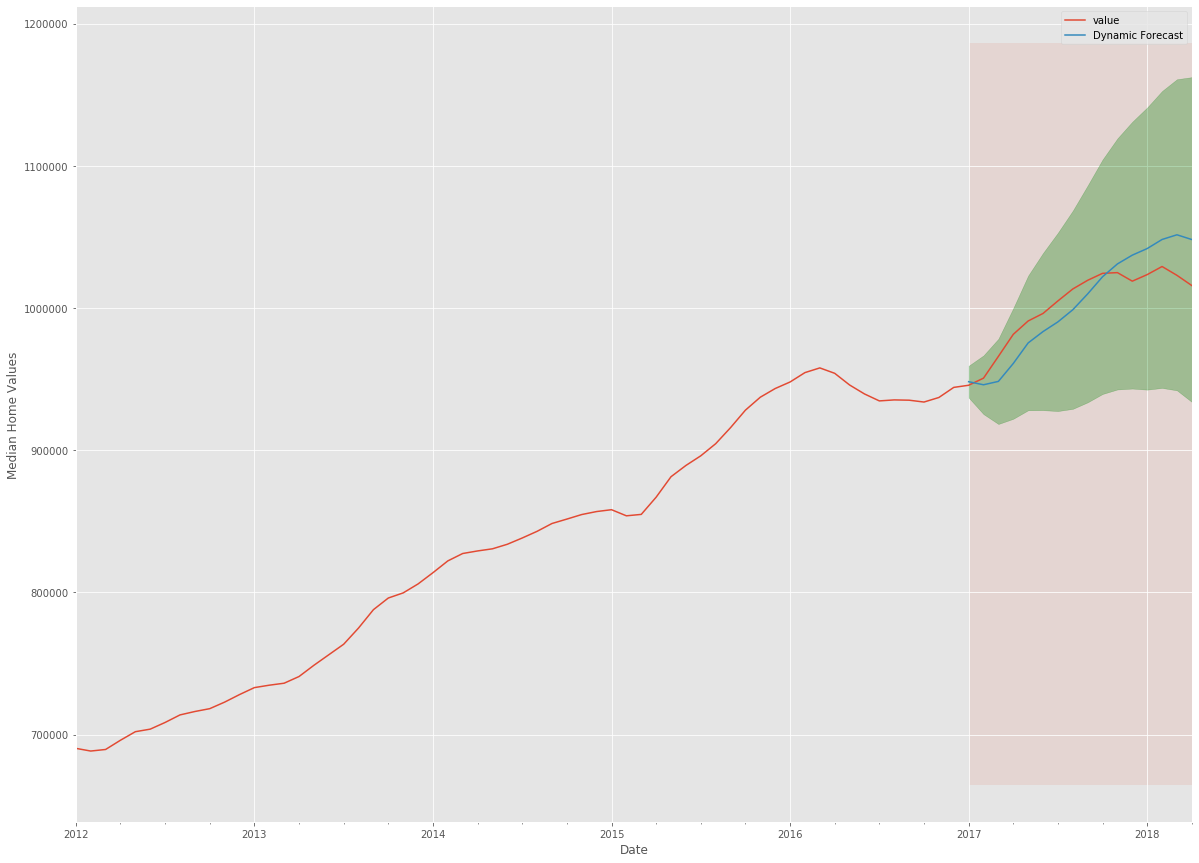

In [160]:
ax = two_zero_nine['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [161]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = two_zero_nine.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 288428637.13


### Visualizing Confidence Interval

In [162]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

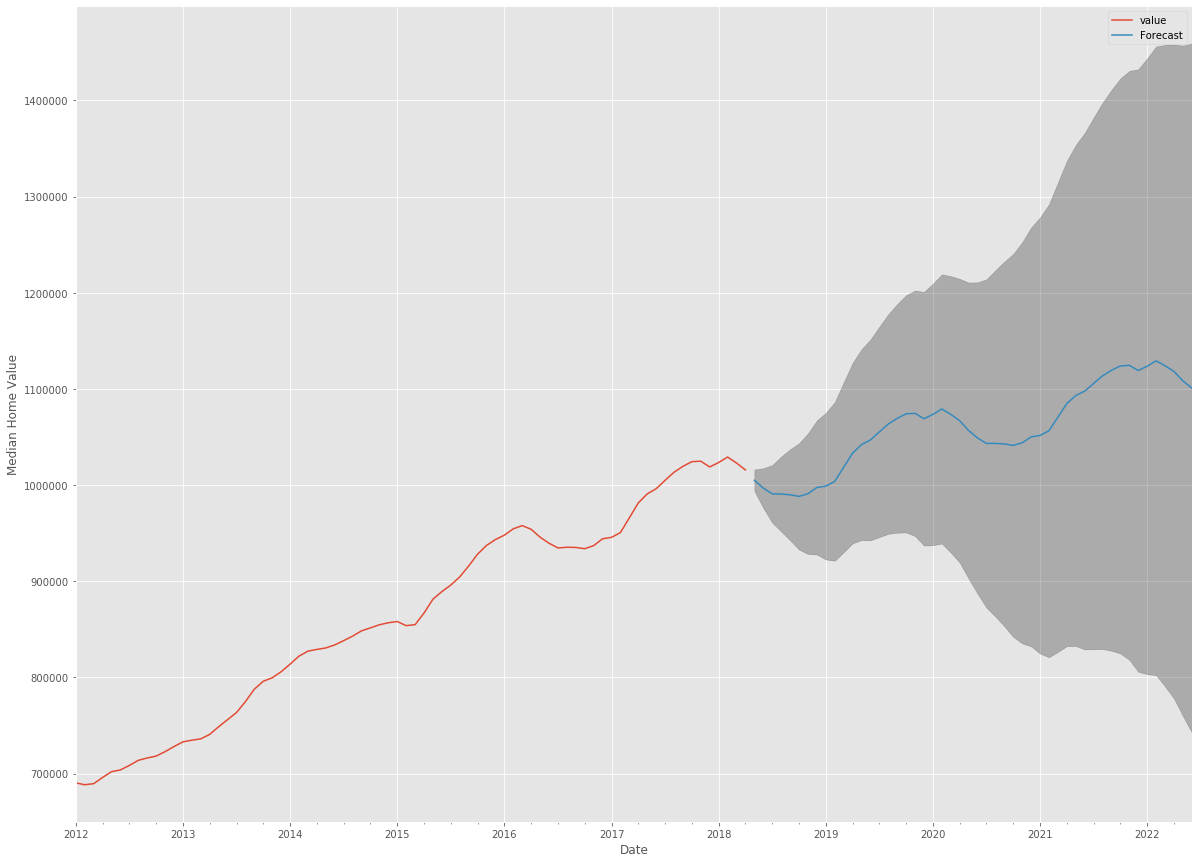

In [163]:
ax = two_zero_nine.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

### 11209 Conclusion: Not Optimal

### 11212

In [164]:
two_one_two = kings_grouped.loc[11212]

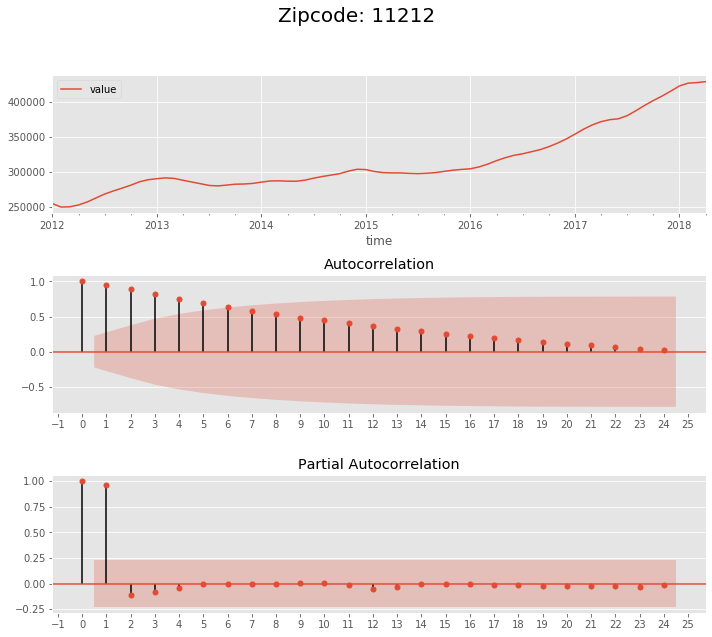

In [165]:
plot_acf_pacf(two_one_two, zipcode = '11212')
plt.show()

### Decompose Time Series

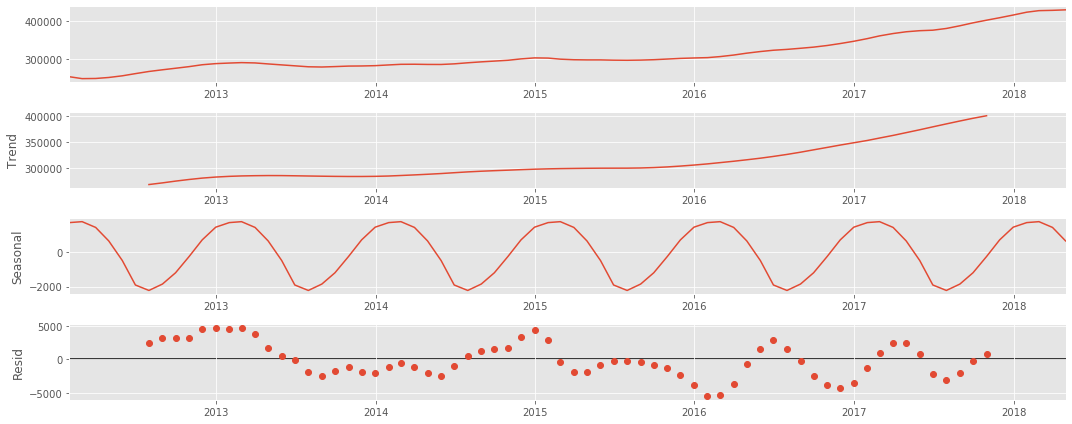

In [166]:
decompose_result = seasonal_decompose(two_one_two, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function (Mean Rolled)

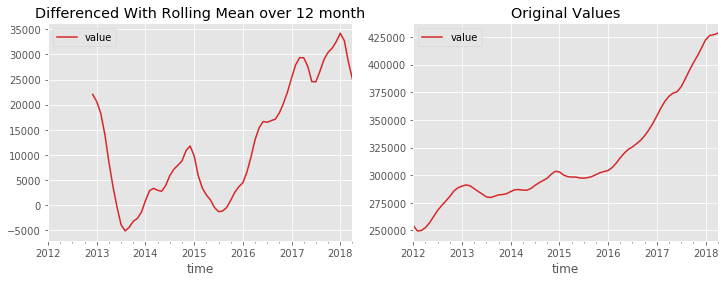

In [167]:
rolling_mean = two_one_two.rolling(window = 12).mean()
two_one_two_rolled_detrended = two_one_two - rolling_mean

ax1 = plt.subplot(121)
two_one_two_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
two_one_two.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

Stationarity is not present.

In [175]:
dftest = adfuller(two_one_two_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -0.7760148816059532
2. P-Value :  0.8260661956414237
3. Num Of Lags :  5
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 59
5. Critical Values :
	 1% :  -3.5463945337644063
	 5% :  -2.911939409384601
	 10% :  -2.5936515282964665


### Using Differencing with Mean Rolled Time Series for Seasonality

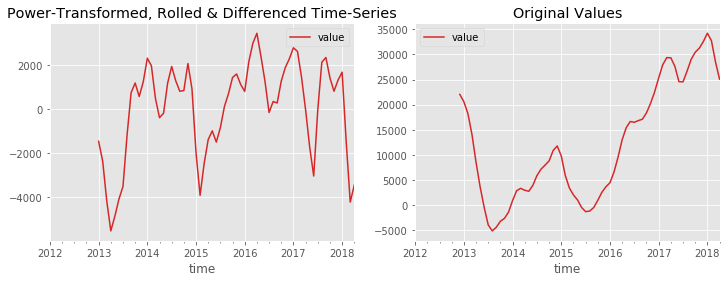

In [176]:
two_one_two_rolled_detrended_diff = two_one_two_rolled_detrended - two_one_two_rolled_detrended.shift()

ax1 = plt.subplot(121)
two_one_two_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
two_one_two_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [171]:
two_one_two = two_one_two_rolled_detrended_diff

### Retesting with the Dicky-Fuller Test

Technically does not have stationarity.

In [172]:
dftest = adfuller(two_one_two.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.3213928988777743
2. P-Value :  0.013948876219160444
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 52
5. Critical Values :
	 1% :  -3.562878534649522
	 5% :  -2.918973284023669
	 10% :  -2.597393446745562


### Parameter Selection

In [177]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [178]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(two_one_two, 
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [179]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic           841.431
Name: 27, dtype: object

### Fitting the Time Series Model - ARIMA

In [180]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(two_one_two, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0094      0.392      0.024      0.981      -0.758       0.777
ma.L1          0.5795      0.275      2.108      0.035       0.041       1.118
ar.S.L12      -0.1939      0.265     -0.733      0.464      -0.712       0.325
ma.S.L12      -1.0976      1.618     -0.678      0.498      -4.269       2.074
sigma2      1.031e+06   1.83e+06      0.564      0.573   -2.55e+06    4.61e+06


### Plot Diagnostics

1. top-left: Seems like random noise more than seasonality. 
2. top-right: Seems to be normally distributed.
3. bottom-left: Mostly adheres to the line.
4. bottom right: Positive values may indicate a missed seasonal component.

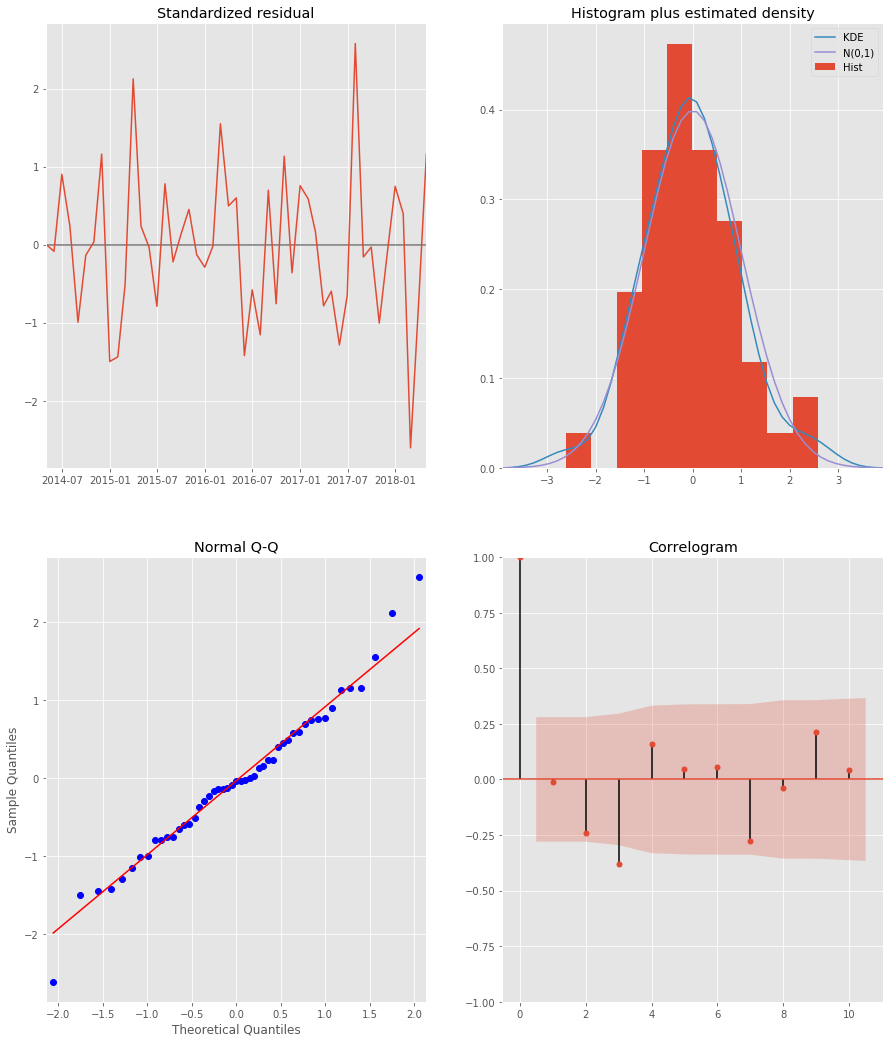

In [181]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [182]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

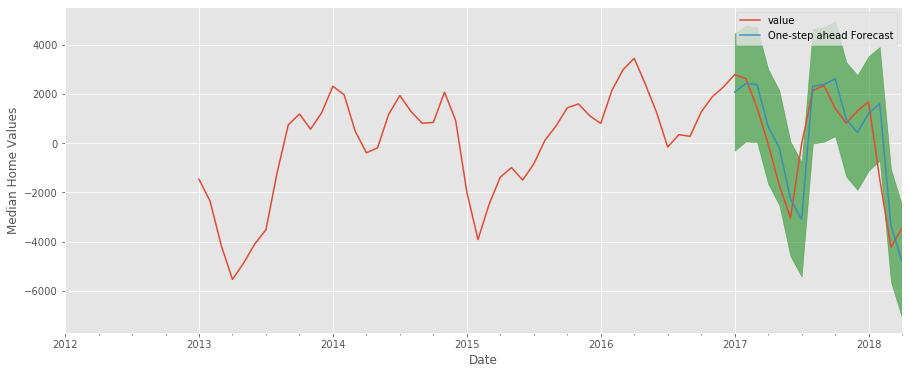

In [183]:

rcParams['figure.figsize'] = 15, 6

ax = two_one_two['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [184]:
val_forecasted = pred.predicted_mean
val_truth = two_one_two.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1795484.46


### Model Validation - Dynamic Forecasting

In [185]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

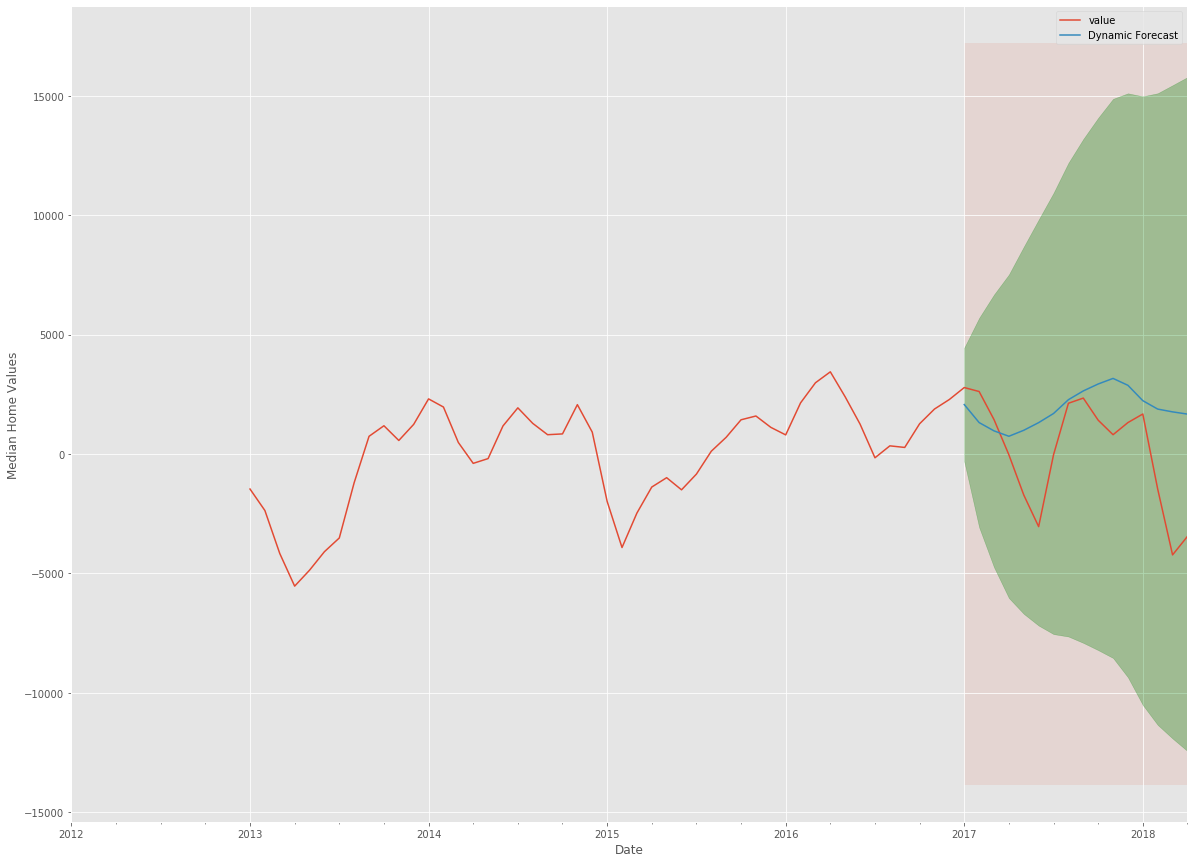

In [186]:
ax = two_one_two['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [187]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = two_one_two.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 7272530.22


### Visualizing Confidence Interval

In [188]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

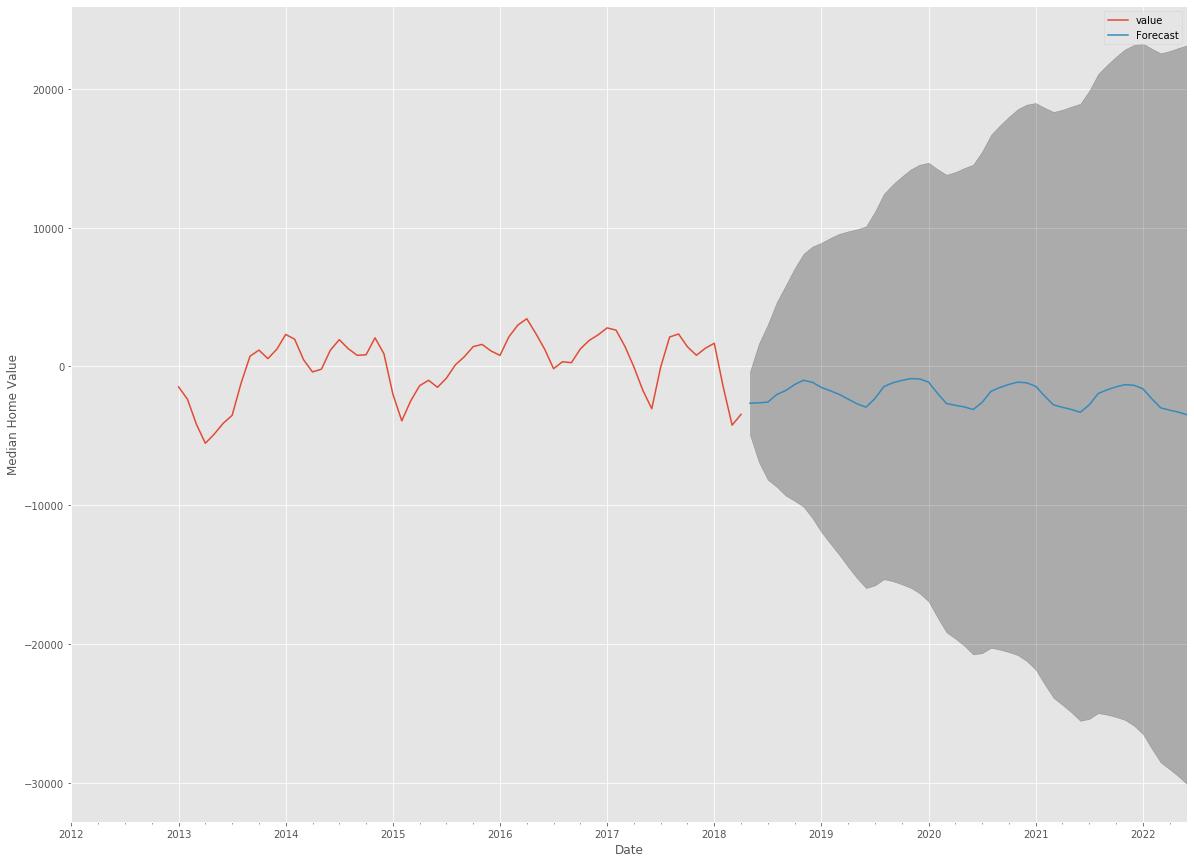

In [189]:
ax = two_one_two.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

### 11212 Conclusion: The best at this point.

### 11214

In [190]:
two_one_four = kings_grouped.loc[11214]

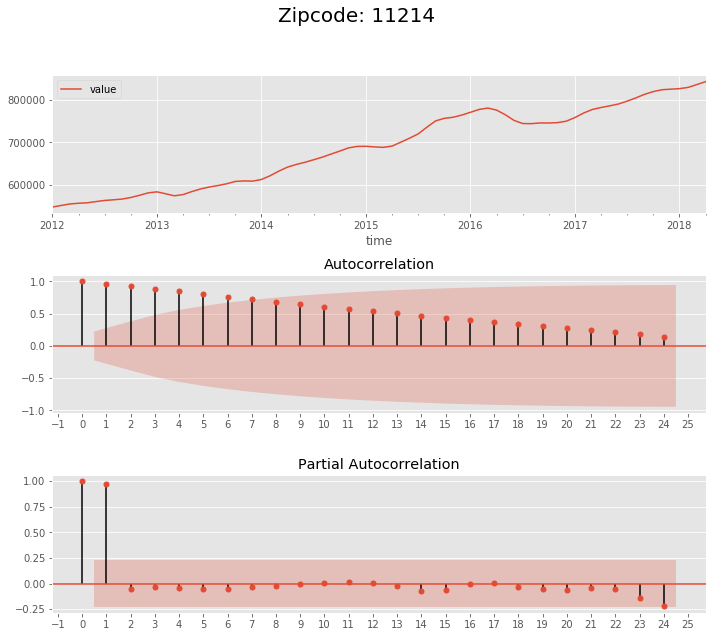

In [191]:
plot_acf_pacf(two_one_four, zipcode = '11214')
plt.show()

### Decompose Time Series

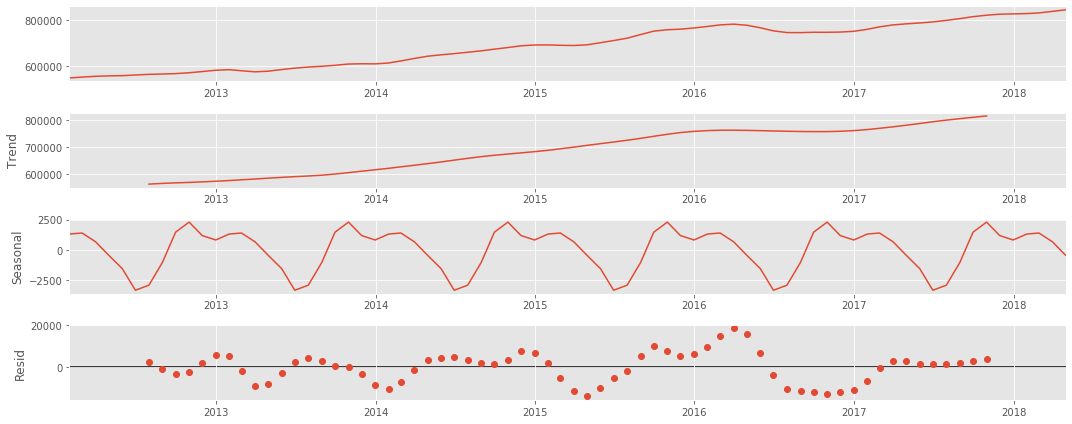

In [192]:
decompose_result = seasonal_decompose(two_one_four, model="additive")

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

### Fixing Trend: Moving Window Function (Mean Rolled)

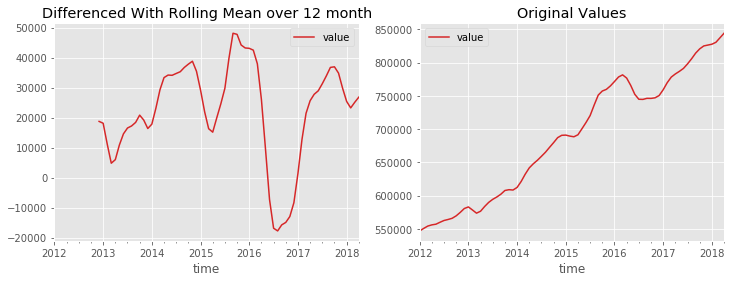

In [193]:
rolling_mean = two_one_four.rolling(window = 12).mean()
two_one_four_rolled_detrended = two_one_four - rolling_mean

ax1 = plt.subplot(121)
two_one_four_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
ax2 = plt.subplot(122)
two_one_four.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

### Testing with the Dicky-Fuller Test

Stationarity is not present.

In [194]:
dftest = adfuller(two_one_four_rolled_detrended.dropna(), autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.887468174917877
2. P-Value :  0.0021290348032552255
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 61
5. Critical Values :
	 1% :  -3.542412746661615
	 5% :  -2.910236235808284
	 10% :  -2.5927445767266866


### Using Differencing with Mean Rolled Time Series for Seasonality

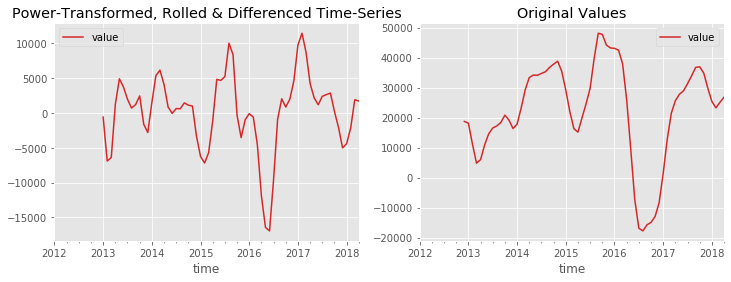

In [195]:
two_one_four_rolled_detrended_diff = two_one_four_rolled_detrended - two_one_four_rolled_detrended.shift()

ax1 = plt.subplot(121)
two_one_four_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
ax2 = plt.subplot(122)
two_one_four_rolled_detrended.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);

In [196]:
two_one_four = two_one_four_rolled_detrended_diff

### Retesting with the Dicky-Fuller Test

In [197]:
dftest = adfuller(two_one_four.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -4.216469821813258
2. P-Value :  0.0006178557234521693
3. Num Of Lags :  8
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 55
5. Critical Values :
	 1% :  -3.5552728880540942
	 5% :  -2.9157312396694217
	 10% :  -2.5956695041322315


### Parameter Selection

In [198]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [199]:
# Run a grid with pdq and seasonal pdq parameters 
#calculated above and get the best (lowest) AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(two_one_four, 
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            #print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

In [200]:
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 1, 1)
pdqs    (0, 1, 1, 12)
aic           917.965
Name: 27, dtype: object

### Fitting the Time Series Model - ARIMA

In [201]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(two_one_four, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2268      0.225      1.007      0.314      -0.215       0.668
ma.L1          0.6478      0.193      3.359      0.001       0.270       1.026
ar.S.L12      -0.1049      0.302     -0.348      0.728      -0.696       0.486
ma.S.L12      -1.3720      0.469     -2.925      0.003      -2.291      -0.453
sigma2      4.042e+06   2.81e+06      1.437      0.151   -1.47e+06    9.56e+06


### Plot Diagnostics


1. top-left: Seems like random noise more than seasonality. 
2. top-right: Seems to be normally distributed.
3. bottom-left: Mostly adheres to the line.
4. bottom right: Positive values may indicate a missed seasonal component.

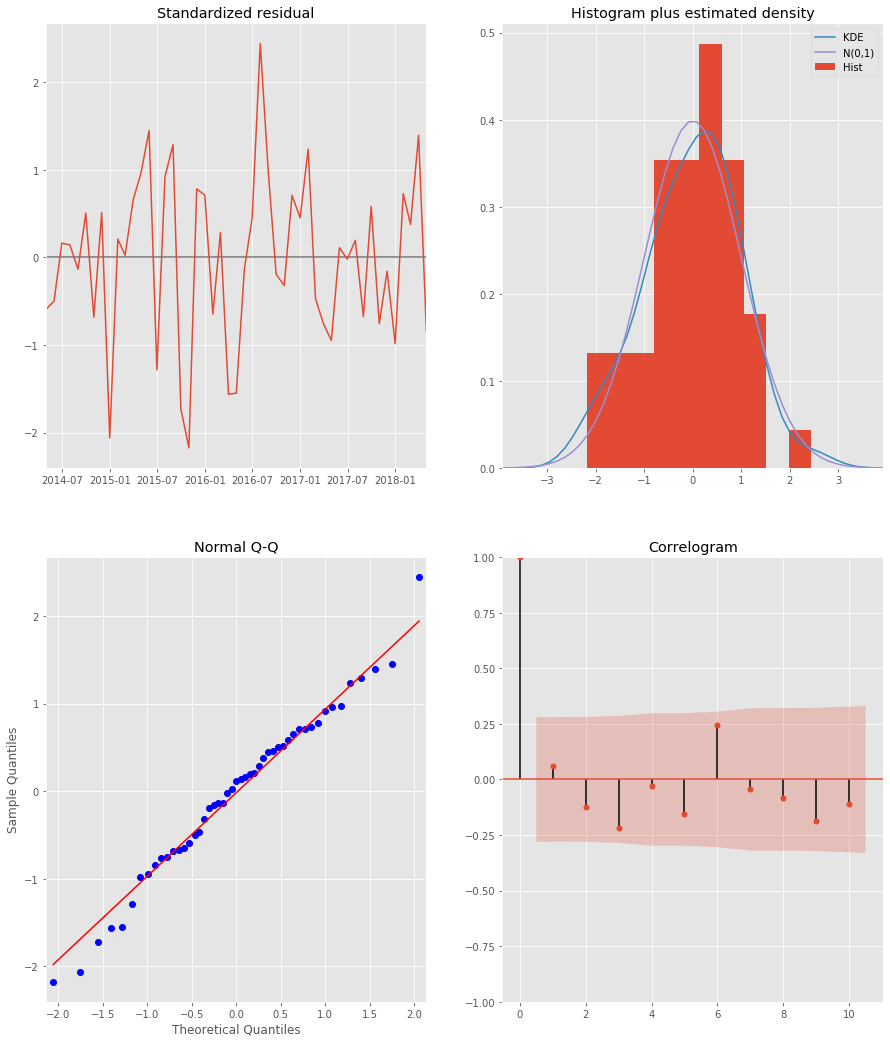

In [202]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

### Model Validation - One Step Ahead Forecasting:

The data can be split 80% and 20% by indicing at 2017-01-31.

In [203]:
pred = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=False)
pred_conf = pred.conf_int()

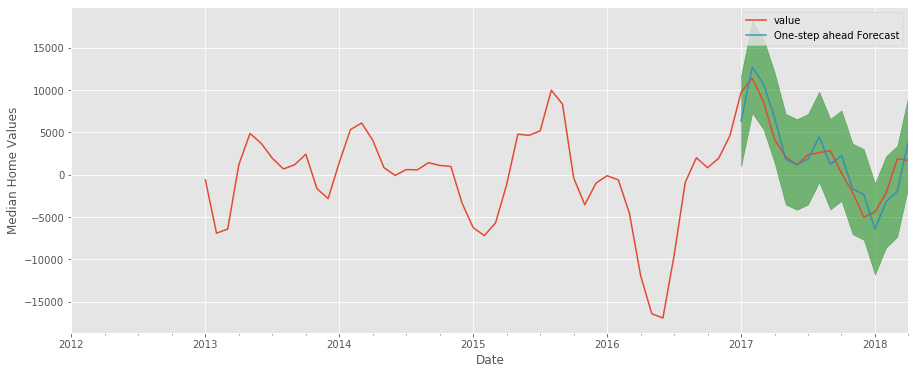

In [204]:

rcParams['figure.figsize'] = 15, 6

ax = two_one_four['2012':].plot(label='observed')

pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')
plt.legend()

plt.show()

### Accuracy Validation with MSE (Mean Squared Error)

In [205]:
val_forecasted = pred.predicted_mean
val_truth = two_one_four.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4211169.61


### Model Validation - Dynamic Forecasting

In [206]:
pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-31'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

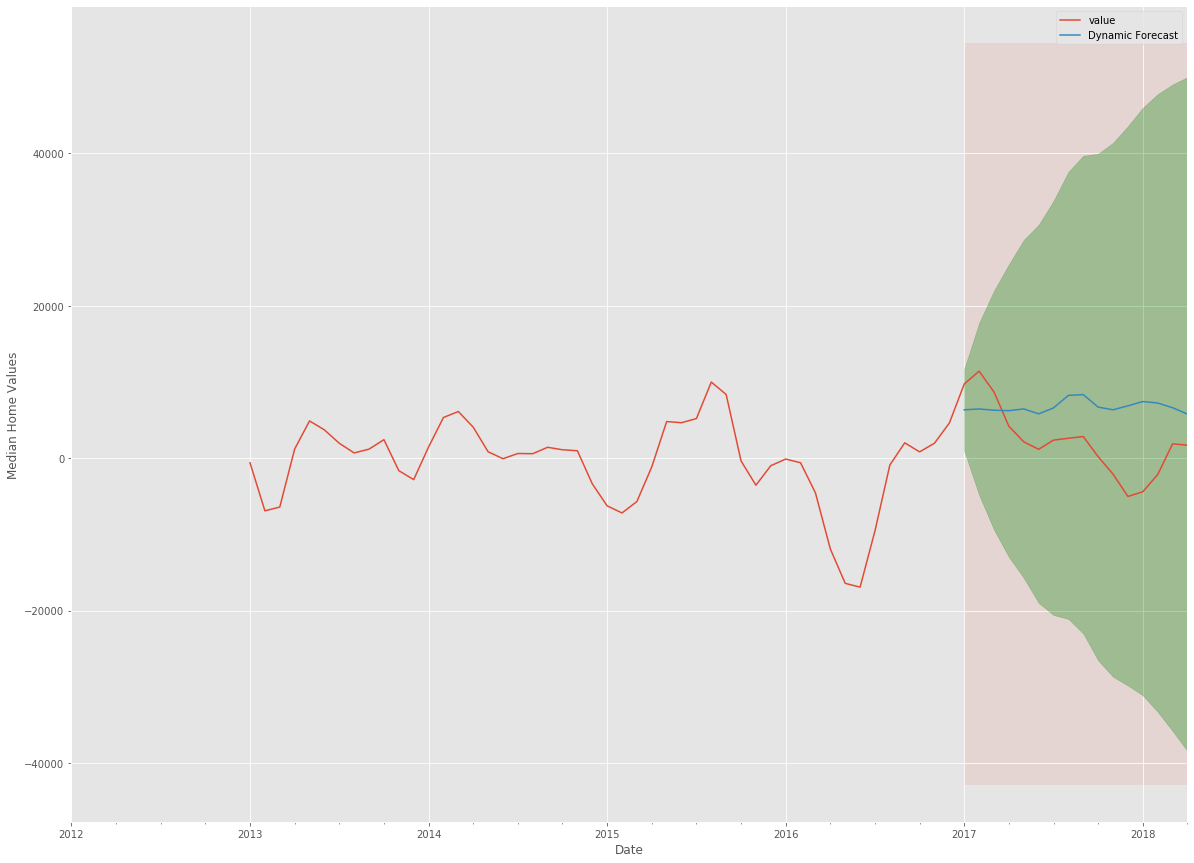

In [207]:
ax = two_one_four['2012':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-31'), val_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Median Home Values')

plt.legend()
plt.show()


In [208]:
val_forecasted = pred_dynamic.predicted_mean
val_truth = two_one_four.loc['2017-01-31':].value

mse = ((val_forecasted - val_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 43023615.5


### Visualizing Confidence Interval

In [209]:
# Get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

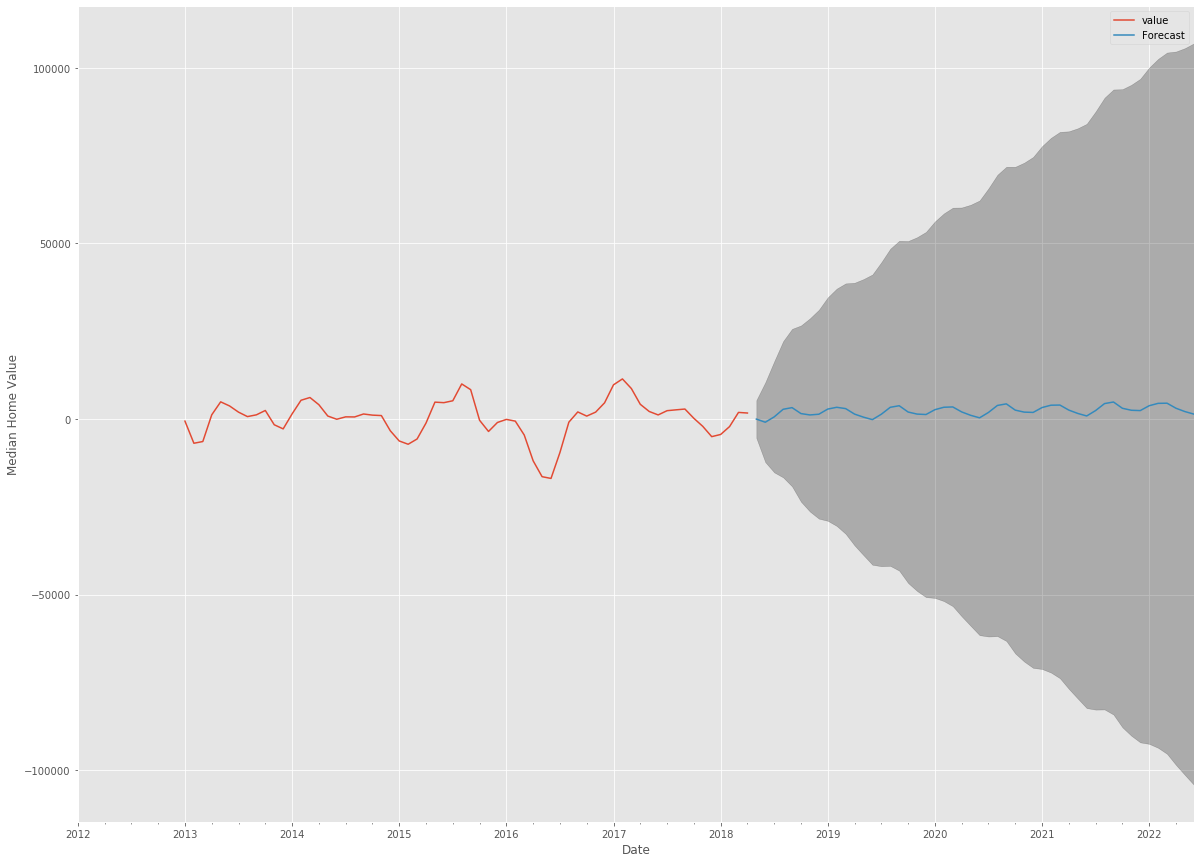

In [210]:
ax = two_one_four.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Median Home Value')

plt.legend()
plt.show()

### 11214 Conclusion: 

# Pickling the kings_grouped Dataframe

In [52]:
kings_grouped.to_pickle("./kings_grouped.pkl")